# PETR6397 - Big Data Analytics - Project

### GROUP 3
####  Venkata Kaushik Belusonti,Preethi Kakarla, Monika Nanjappa, Teja Akula, Yogesh Paranam & Tasneem Attarwala


### Import required libraries

In [ ]:
#Import pre-processing and visualization libraries
import pandas as pd # Performs data manipulation and analysis on data frame
import numpy as np # Numerical python libraray that performs numberical operations on arrays
import scipy.stats as stats #for evaluation of data distribution
import seaborn as sns # A python visualization library build on matplotlib library
import matplotlib.pyplot as plt # An interface that plots the figures like MATLAB tool #https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
from mpl_toolkits.mplot3d import Axes3D #to create 3d plots
import plotly.express as px #for advanced visulalization plots
from sklearn.impute import SimpleImputer
import missingno as msno # Plot for visualizing the number of missing values
import plotly.graph_objects as go
import warnings
#import altair as alt
from tabulate import tabulate

# Import feature scaling and ML evaluation metric libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV #spit data for training and testing the machine learning algorithms
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #from sklearn get evaluation metrics
from sklearn.model_selection import GridSearchCV #importing the gridsearch for best results
from sklearn.feature_selection import SelectKBest, f_regression #for feature selection


# Import machine learning algorithhm libraries
from sklearn.linear_model import Lasso, LinearRegression, Ridge #from sklearn get regrssion models
from sklearn.svm import SVR #support vector regrssion from sklearn
from sklearn.neighbors import KNeighborsRegressor #k nearets neighbor from klearn library
from sklearn.ensemble import RandomForestRegressor #Random forest Regressor frm sklearn
from xgboost import XGBRegressor # from XGboost we get the XgBregrssor
from sklearn.tree import DecisionTreeRegressor #using the skelarn tree libbray for importing decsion trees
from sklearn.neural_network import MLPRegressor # from sklearn nearural netwrok get the MLpregrssor
from sklearn.feature_selection import SelectKBest, f_regression #for feature selection
from sklearn.svm import SVR # svm regression
from sklearn.ensemble import VotingRegressor #ensemble model libabray for majority voting

### User Defined Functions

In [ ]:
# Function to remove the attributes with number of missing data points greater than pre-defined threshold value
def remove_columns_with_high_missing_values(df, threshold):
    # Calculate the threshold count
    threshold_count = threshold * len(df)

    # Find columns with missing values count exceeding the threshold
    columns_to_remove = df.columns[df.isnull().sum() > threshold_count]

    # Remove columns from DataFrame
    df_cleaned = df.drop(columns=columns_to_remove)

    return df_cleaned

In [ ]:
def plot_map(df, column, title):
    """
    Create an animated choropleth map with specified data and parameters.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be used as the color metric.
        title (str): The title of the choropleth map.

    Returns:
        fig: The Plotly figure object representing the choropleth map.
    """

    # Create a choropleth map using Plotly Express
    fig = px.choropleth(
        df,
        locations = 'Country',
        locationmode = 'country names',
        color = column,
        hover_name = 'Country',
        color_continuous_scale = 'RdYlGn',
        animation_frame = 'Reported_Year',
        range_color = [0, 100])

    # Update geographic features
    fig.update_geos(
        showcoastlines = True,
        coastlinecolor = "Black",
        showland = True,
        landcolor = "white",
        showcountries = True,
        showocean = True,
        oceancolor = "LightBlue")

    # Update the layout of the figure
    fig.update_layout(
        title_text = title,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection_type = 'equirectangular',
            showland = True,
            landcolor = "white",
            showcountries = True,
            showocean = True,
            oceancolor = "LightBlue"),
        width = 1000,
        height = 850,
        dragmode = 'pan',
        hovermode = 'closest',
        coloraxis_colorbar = dict(
            title = column,
            title_font_size = 14,
            title_side = 'right',
            lenmode = 'pixels',
            len = 300,
            thicknessmode = 'pixels',
            thickness = 15),
        updatemenus = [
            {"type": "buttons", "showactive": False, "x": 0.1, "y": 0.9, "buttons": [{"label": "Play", "method": "animate"}]},
            {"type": "buttons", "showactive": False, "x": 0.18, "y": 0.9, "buttons": [{"label": "Pause", "method": "animate"}]},
            {"type": "buttons", "showactive": False, "x": 0.26, "y": 0.9, "buttons": [{"label": "Stop", "method": "animate"}]}],
        sliders = [{"yanchor": "top", "xanchor": "left", "currentvalue": {"font": {"size": 20}}, "steps": []}])

    # Create slider steps for animation
    slider_steps = []

    for year in df['Reported_Year'].unique():
        step = {
            "args": [
                [year],
                {"frame": {"duration": 300, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
            "label": str(year),
            "method": "animate"}
        slider_steps.append(step)

    # Assign slider steps to the figure layout
    fig.layout.updatemenus[0].buttons[0].args[1]['steps'] = slider_steps

    return fig

In [ ]:
# Function to calculate Train RMSE, Test RMSE, Train R2 & Test R2
def Regression_PM(Pred_Train, Actual_Train, Pred_Test, Actual_Test):
    RMSE_Train = round(np.sqrt(mean_squared_error(Actual_Train, Pred_Train)),3)
    RMSE_Test = round(np.sqrt(mean_squared_error(Actual_Test, Pred_Test)),3)
    R2_Train = round(r2_score(Actual_Train, Pred_Train),3)
    R2_Test = round(r2_score(Actual_Test,Pred_Test),3)
    return [RMSE_Train, RMSE_Test, R2_Train, R2_Test]

### Load the dataset and convert into the dataframe

In [ ]:
# Load global data name global.csv from
# Convert the data into dataframe
df = pd.read_csv('global.csv') # Read data from CSV and convert into dataframe

df_copy = df.copy() #making a copy to reference the original column names later

### Data Pre-processing

#### Understanding the dataset

In [ ]:
# Get the size of the dataset
print("Number of tuples in dataset: ", df.shape[0])
print("Number of columns in the dataset: ", df.shape[1])

Number of tuples in dataset:  3649
Number of columns in the dataset:  21


The dataset is sufficient large in size to use it for classification/regression analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Observations:
1. The columns names are inconsistent.
2. Feature named, *Density* has units associated to it and hence supposed to a numerical feature. However, the datatype is mentioned as Object, which also needs to be looked into.


#### Rename the features

In [ ]:
# Changing the column name for consistency
df = df.rename({df.columns[0]:"Country"}, axis='columns')
df = df.rename({df.columns[1]:"Reported_Year"}, axis='columns')
df = df.rename({df.columns[2]:"Population_EnergyAccess_Percentage"}, axis='columns')
df = df.rename({df.columns[3]:"Population_CookingFuelAccess_Percentage"}, axis='columns')
df = df.rename({df.columns[4]:"RenewableEnergy_Generation_PerCapita"}, axis='columns')
df = df.rename({df.columns[5]:"ForiegnAid_USD"}, axis='columns')
df = df.rename({df.columns[6]:"Energy_Renewable_in_TotalConsumption_Percentage"}, axis='columns')
df = df.rename({df.columns[7]:"Energy_Generatedfrom_Fossils_TWh"}, axis='columns')
df = df.rename({df.columns[8]:"Energy_Generatedfrom_Nuclear_TWh"}, axis='columns')
df = df.rename({df.columns[9]:"Energy_Generatedfrom_Renewables_TWh"}, axis='columns')
df = df.rename({df.columns[10]:"Energy_LowCarbon_inTotal_Percentage"}, axis='columns')
df = df.rename({df.columns[11]:"EnergyConsumption_perPerson_KWhperPerson"}, axis='columns')
df = df.rename({df.columns[12]:"Energy_to_GDP"}, axis='columns')
df = df.rename({df.columns[13]:"CO2Emission_perCapita"}, axis='columns')
df = df.rename({df.columns[14]:"Renewable_Percentage"}, axis='columns')
df = df.rename({df.columns[15]:"GDP_Growth"}, axis='columns')
df = df.rename({df.columns[16]:"GDP_perCapita"}, axis='columns')
df = df.rename({df.columns[17]:"Population_Density"}, axis='columns')
df = df.rename({df.columns[18]:"Country_Area"}, axis='columns')
df = df.rename({df.columns[19]:"Country_Latitude"}, axis='columns')
df = df.rename({df.columns[20]:"Country_Longitude"}, axis='columns')

# Get the datframe info after renaming few columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          3649 non-null   object 
 1   Reported_Year                                    3649 non-null   int64  
 2   Population_EnergyAccess_Percentage               3639 non-null   float64
 3   Population_CookingFuelAccess_Percentage          3480 non-null   float64
 4   RenewableEnergy_Generation_PerCapita             2718 non-null   float64
 5   ForiegnAid_USD                                   1560 non-null   float64
 6   Energy_Renewable_in_TotalConsumption_Percentage  3455 non-null   float64
 7   Energy_Generatedfrom_Fossils_TWh                 3628 non-null   float64
 8   Energy_Generatedfrom_Nuclear_TWh                 3523 non-null   float64
 9   Energy_Generatedfrom_Renewable

#### Convert datatype of Population_Density from object to numeric

In [ ]:
df['Population_Density'] = pd.to_numeric(df['Population_Density'], errors='coerce')

In [ ]:
# Display the statistical characterists of the dataframe
df.describe()

Reported_Year  Population_EnergyAccess_Percentage  \
count    3649.000000                         3639.000000   
mean     2010.038367                           78.933702   
std         6.054228                           30.275541   
min      2000.000000                            1.252269   
25%      2005.000000                           59.800890   
50%      2010.000000                           98.361570   
75%      2015.000000                          100.000000   
max      2020.000000                          100.000000   

       Population_CookingFuelAccess_Percentage  \
count                              3480.000000   
mean                                 63.255287   
std                                  39.043658   
min                                   0.000000   
25%                                  23.175000   
50%                                  83.150000   
75%                                 100.000000   
max                                 100.000000   

       RenewableEnergy_Generation_PerCapita  ForiegnAid_USD  \
count                           2718.000000    1.560000e+03   
mean                             113.137498    9.422400e+07   
std                              244.167256    2.981544e+08   
min                                0.000000    0.000000e+00   
25%                                3.540000    2.600000e+05   
50%                               32.910000    5.665000e+06   
75%                              112.210000    5.534750e+07   
max                             3060.190000    5.202310e+09   

       Energy_Renewable_in_TotalConsumption_Percentage  \
count                                      3455.000000   
mean                                         32.638165   
std                                          29.894901   
min                                           0.000000   
25%                                           6.515000   
50%                                          23.300000   
75%                                          55.245000   
max                                          96.040000   

       Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
count                       3628.000000                       3523.000000   
mean                          70.365003                         13.450190   
std                          348.051866                         73.006623   
min                            0.000000                          0.000000   
25%                            0.290000                          0.000000   
50%                            2.970000                          0.000000   
75%                           26.837500                          0.000000   
max                         5184.130000                        809.410000   

       Energy_Generatedfrom_Renewables_TWh  \
count                          3628.000000   
mean                             23.968010   
std                             104.431085   
min                               0.000000   
25%                               0.040000   
50%                               1.470000   
75%                               9.600000   
max                            2184.940000   

       Energy_LowCarbon_inTotal_Percentage  \
count                          3607.000000   
mean                             36.801182   
std                              34.314884   
min                               0.000000   
25%                               2.877847   
50%                              27.865068   
75%                              64.403792   
max                             100.000010   

       EnergyConsumption_perPerson_KWhperPerson  Energy_to_GDP  \
count                               3649.000000    3442.000000   
mean                               25743.981745       5.307345   
std                                34773.221366       3.532020   
min                                    0.000000       0.110000   
25%                                 3116.737300       3.170000   
50% 

#### Dealing missing values

In [ ]:
# Display the number of missing data points in the feature
df.isnull().sum() #total noumber of null values in each feature

Country                                               0
Reported_Year                                         0
Population_EnergyAccess_Percentage                   10
Population_CookingFuelAccess_Percentage             169
RenewableEnergy_Generation_PerCapita                931
ForiegnAid_USD                                     2089
Energy_Renewable_in_TotalConsumption_Percentage     194
Energy_Generatedfrom_Fossils_TWh                     21
Energy_Generatedfrom_Nuclear_TWh                    126
Energy_Generatedfrom_Renewables_TWh                  21
Energy_LowCarbon_inTotal_Percentage                  42
EnergyConsumption_perPerson_KWhperPerson              0
Energy_to_GDP                                       207
CO2Emission_perCapita                               428
Renewable_Percentage                               2137
GDP_Growth                                          317
GDP_perCapita                                       282
Population_Density                              

#### Deleting attributes that exhibit a missing value count exceeding 25%

In [ ]:
# Delete the attributes with number of missing values greater than 25% of the feature size
df = remove_columns_with_high_missing_values(df,0.25)

# Get the information of the dataframe after removing the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          3649 non-null   object 
 1   Reported_Year                                    3649 non-null   int64  
 2   Population_EnergyAccess_Percentage               3639 non-null   float64
 3   Population_CookingFuelAccess_Percentage          3480 non-null   float64
 4   Energy_Renewable_in_TotalConsumption_Percentage  3455 non-null   float64
 5   Energy_Generatedfrom_Fossils_TWh                 3628 non-null   float64
 6   Energy_Generatedfrom_Nuclear_TWh                 3523 non-null   float64
 7   Energy_Generatedfrom_Renewables_TWh              3628 non-null   float64
 8   Energy_LowCarbon_inTotal_Percentage              3607 non-null   float64
 9   EnergyConsumption_perPerson_KW

The total number of features is reduced from 22 features to 18 features after removinf the features with missing data points contributing to atleast 25% of the feature size.

In [ ]:
# Display the number of missing data points of the features in the reduced dataset
df.isnull().sum() #total noumber of null values in each feature

Country                                              0
Reported_Year                                        0
Population_EnergyAccess_Percentage                  10
Population_CookingFuelAccess_Percentage            169
Energy_Renewable_in_TotalConsumption_Percentage    194
Energy_Generatedfrom_Fossils_TWh                    21
Energy_Generatedfrom_Nuclear_TWh                   126
Energy_Generatedfrom_Renewables_TWh                 21
Energy_LowCarbon_inTotal_Percentage                 42
EnergyConsumption_perPerson_KWhperPerson             0
Energy_to_GDP                                      207
CO2Emission_perCapita                              428
GDP_Growth                                         317
GDP_perCapita                                      282
Population_Density                                 106
Country_Area                                         1
Country_Latitude                                     1
Country_Longitude                                    1
dtype: int

### Checking the duplicate tuples before handling the missing data

In [ ]:
# Check the number of duplicated tuples
print("Number of duplicate tuples: ",df.duplicated().sum())

Number of duplicate tuples:  0


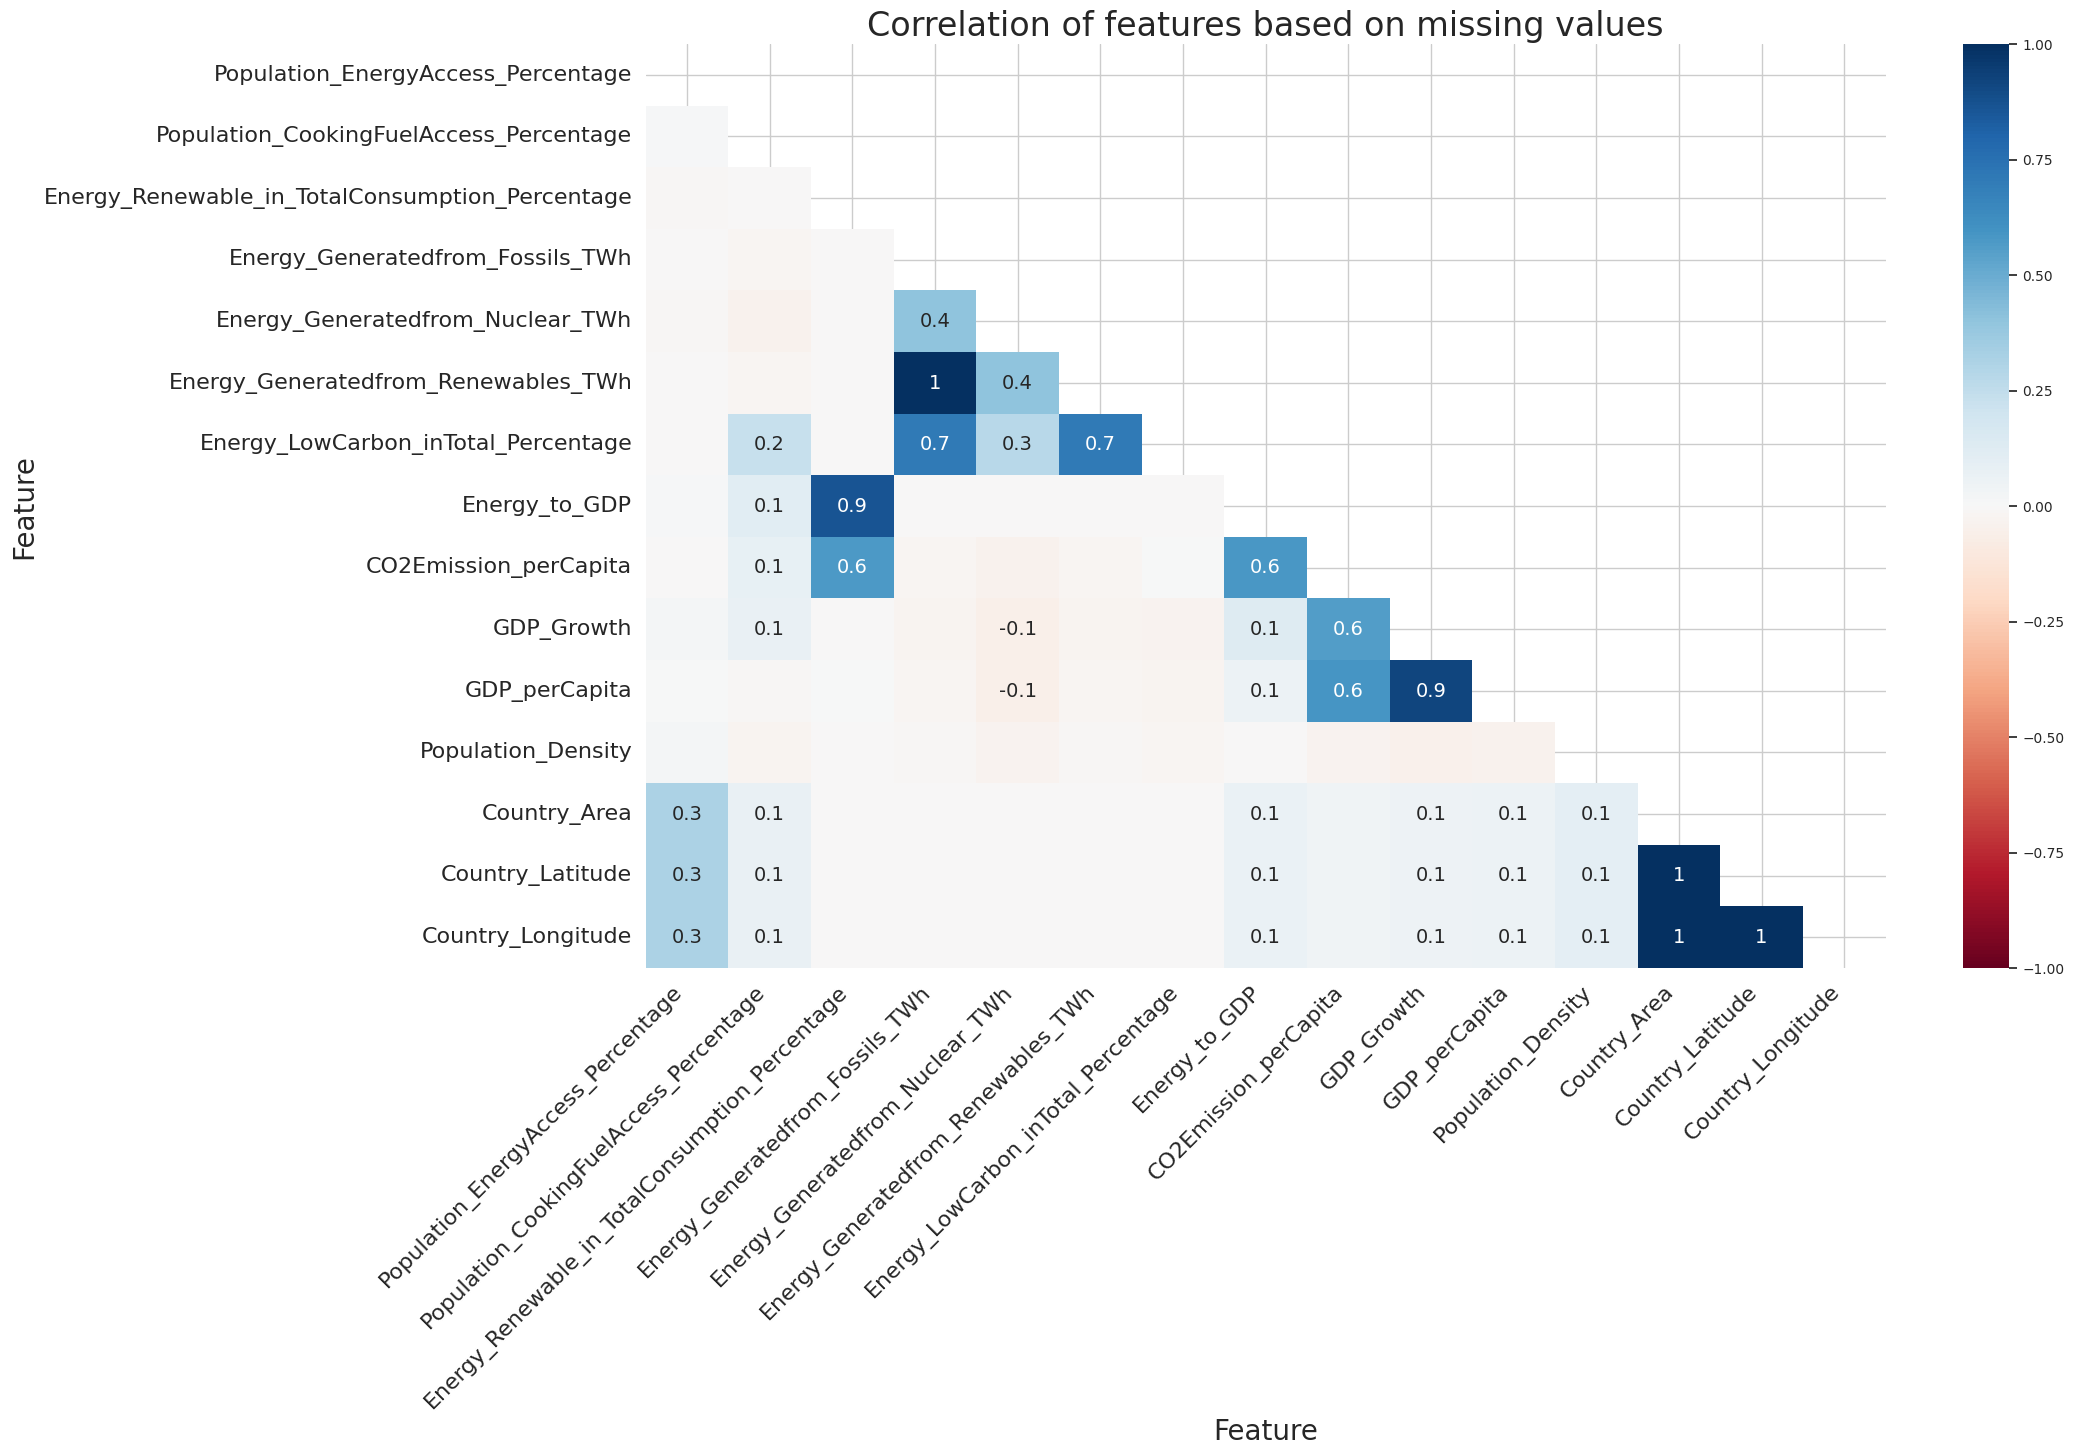

In [ ]:
# Visualization of missing values in the dataframe after removing the irrelevant features
msno.heatmap(df)
plt.title("Correlation of features based on missing values", fontsize=24)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.show()

Observations: <br>
1. Attributes named, *Population_Density*, *Country_Area*, *Country_latitude* and *Country_Longitude*, each has one missing value and is in the same tuple. <br>
2. Attributes named, *Energy_Generatedfrom_Renewables_TWh* and *Energy_Generatedfrom_Fossils_TWh*, each has one missing value and is in the same tuple. <br>

Action: <br>
1. So, the single row needs to deleted.

In [ ]:
# Delete a tuple that has missing value in common attributes
df = df.dropna(subset=['Country_Area'])
df = df.dropna(subset=['Energy_Generatedfrom_Renewables_TWh', 'Energy_Generatedfrom_Fossils_TWh'])

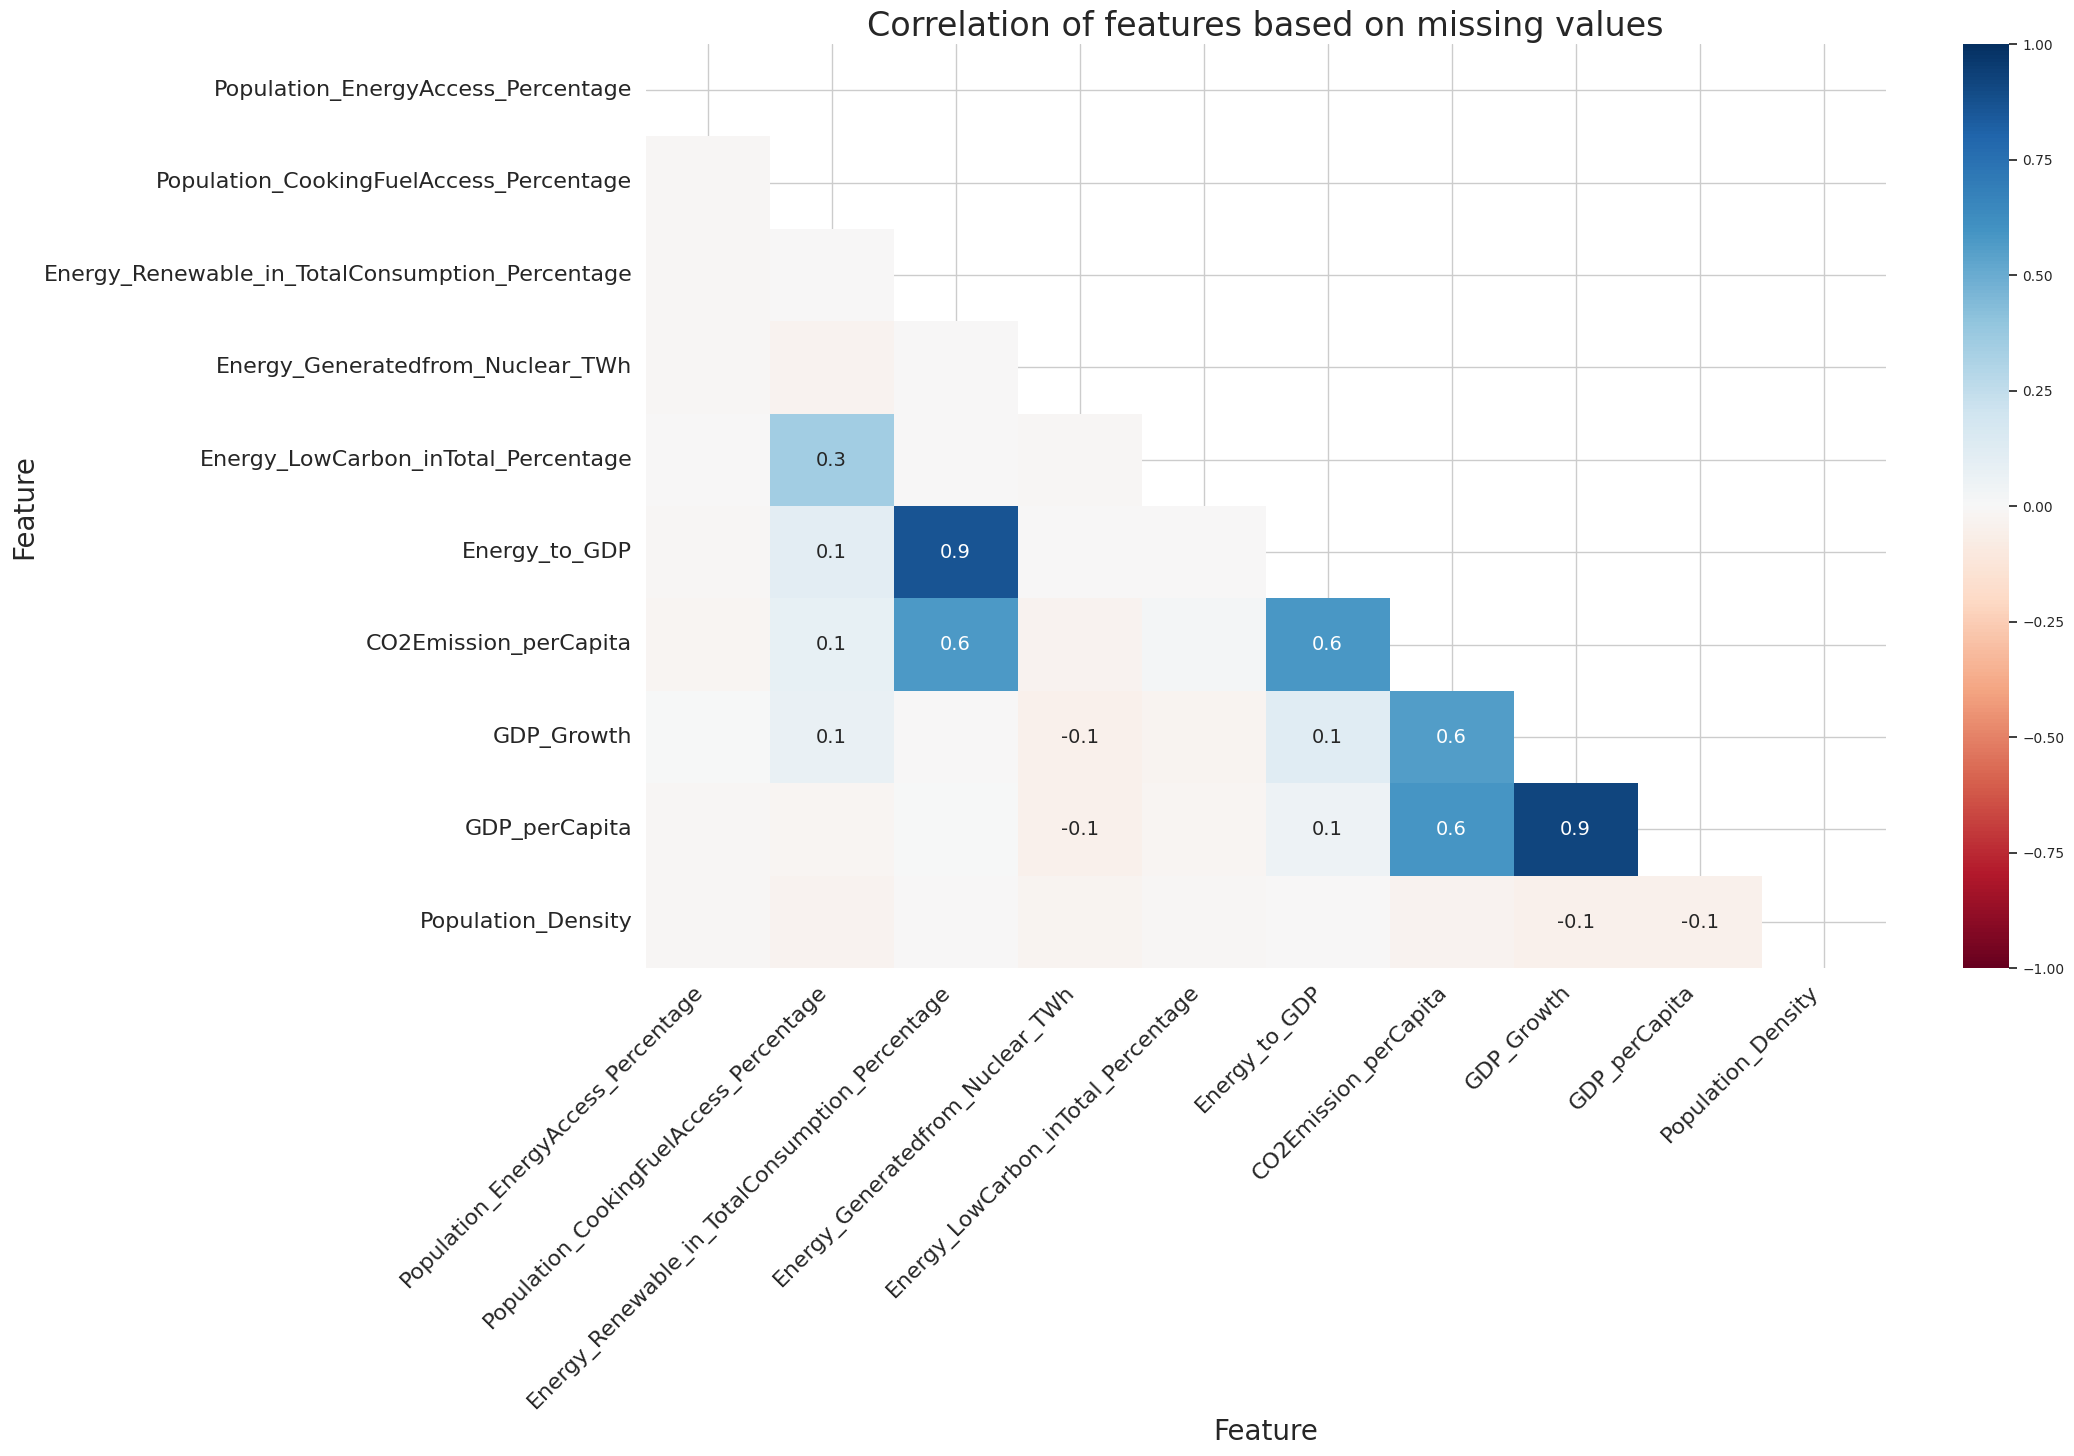

In [ ]:
# Visualization of missing values in the dataframe after removing the tuple
msno.heatmap(df)
plt.title("Correlation of features based on missing values", fontsize=24)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.show()

In [ ]:
# Display the number of missing data points of the features in the reduced dataset
df.isnull().sum() #total noumber of null values in each feature

Country                                              0
Reported_Year                                        0
Population_EnergyAccess_Percentage                   9
Population_CookingFuelAccess_Percentage            168
Energy_Renewable_in_TotalConsumption_Percentage    193
Energy_Generatedfrom_Fossils_TWh                     0
Energy_Generatedfrom_Nuclear_TWh                   105
Energy_Generatedfrom_Renewables_TWh                  0
Energy_LowCarbon_inTotal_Percentage                 21
EnergyConsumption_perPerson_KWhperPerson             0
Energy_to_GDP                                      205
CO2Emission_perCapita                              426
GDP_Growth                                         316
GDP_perCapita                                      281
Population_Density                                 105
Country_Area                                         0
Country_Latitude                                     0
Country_Longitude                                    0
dtype: int

##### Understand the distribution of the features before dealing with the missing values

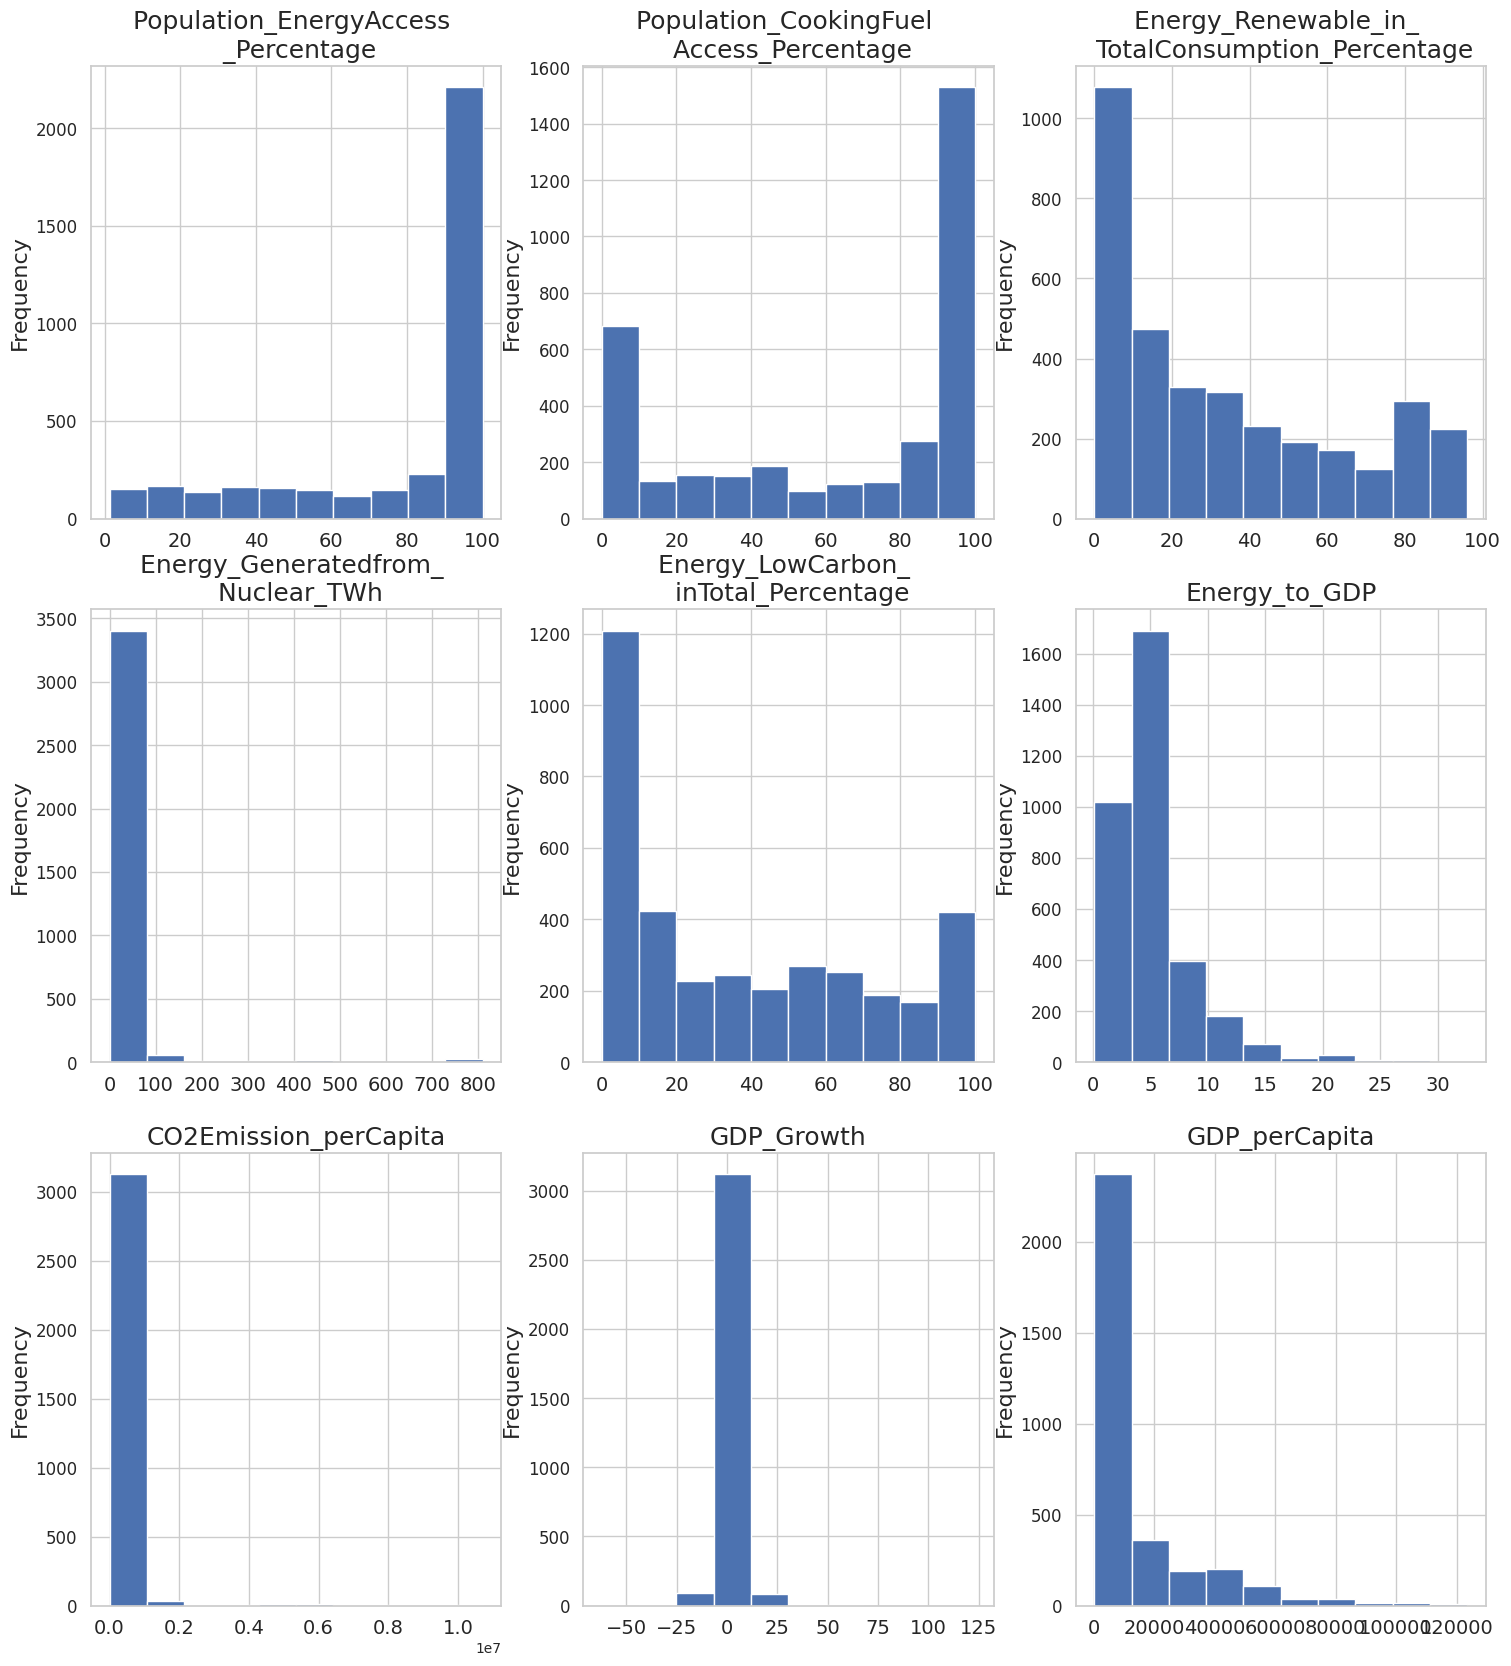

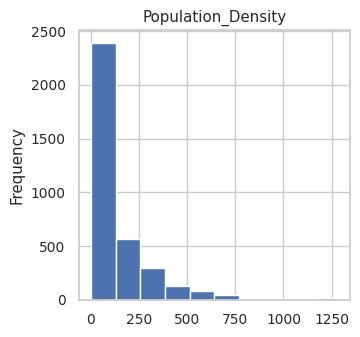

In [ ]:
# Histograms of the attributes with missing values
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(18)

plt.subplot(331)
df['Population_EnergyAccess_Percentage'].hist()
plt.title('Population_EnergyAccess \n _Percentage', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(332)
df['Population_CookingFuelAccess_Percentage'].hist()
plt.title('Population_CookingFuel \n Access_Percentage', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(333)
df['Energy_Renewable_in_TotalConsumption_Percentage'].hist()
plt.title('Energy_Renewable_in_ \n TotalConsumption_Percentage', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(334)
df['Energy_Generatedfrom_Nuclear_TWh'].hist()
plt.title('Energy_Generatedfrom_ \n Nuclear_TWh', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(335)
df['Energy_LowCarbon_inTotal_Percentage'].hist()
plt.title('Energy_LowCarbon_ \n inTotal_Percentage', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(336)
df['Energy_to_GDP'].hist()
plt.title('Energy_to_GDP', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(337)
df['CO2Emission_perCapita'].hist()
plt.title('CO2Emission_perCapita', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(338)
df['GDP_Growth'].hist()
plt.title('GDP_Growth', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.subplot(339)
df['GDP_perCapita'].hist()
plt.title('GDP_perCapita', fontsize=18)
plt.xticks(rotation = 0, ha = 'center', fontsize=14)
plt.yticks(rotation = 0, fontsize=12)
plt.ylabel('Frequency', fontsize=16)

plt.show()

fig = plt.figure()
fig.set_figheight(3.5)
fig.set_figwidth(3.5)

plt.subplot(111)
df['Population_Density'].hist()
plt.title('Population_Density')
plt.ylabel('Frequency')

plt.show()


The features containing missing data do not adhere to either a normal or uniform distribution and are primarily clustered within a narrow range of values. Therefore, imputation of the missing data points will be performed using the median.

Replacing the missing values with median value

In [ ]:
# Replace missing value in the feature by replacing the missing data point with median value of the feature
df['Population_EnergyAccess_Percentage'] = df['Population_EnergyAccess_Percentage'].fillna(df['Population_EnergyAccess_Percentage'].median())
df['Population_CookingFuelAccess_Percentage'] = df['Population_CookingFuelAccess_Percentage'].fillna(df['Population_CookingFuelAccess_Percentage'].median())
df['Energy_Renewable_in_TotalConsumption_Percentage'] = df['Energy_Renewable_in_TotalConsumption_Percentage'].fillna(df['Energy_Renewable_in_TotalConsumption_Percentage'].median())
df['Energy_Generatedfrom_Nuclear_TWh'] = df['Energy_Generatedfrom_Nuclear_TWh'].fillna(df['Energy_Generatedfrom_Nuclear_TWh'].median())
df['Energy_LowCarbon_inTotal_Percentage'] = df['Energy_LowCarbon_inTotal_Percentage'].fillna(df['Energy_LowCarbon_inTotal_Percentage'].median())
df['Energy_to_GDP'] = df['Energy_to_GDP'].fillna(df['Energy_to_GDP'].median())
df['CO2Emission_perCapita'] = df['CO2Emission_perCapita'].fillna(df['CO2Emission_perCapita'].median())
df['GDP_Growth'] = df['GDP_Growth'].fillna(df['GDP_Growth'].median())
df['GDP_perCapita'] = df['GDP_perCapita'].fillna(df['GDP_perCapita'].median())
df['Population_Density'] = df['Population_Density'].fillna(df['Population_Density'].median())

In [ ]:
# Checking whether the imputation by median filled the missing data points
df.isnull().sum() #total noumber of null values in each feature

Country                                            0
Reported_Year                                      0
Population_EnergyAccess_Percentage                 0
Population_CookingFuelAccess_Percentage            0
Energy_Renewable_in_TotalConsumption_Percentage    0
Energy_Generatedfrom_Fossils_TWh                   0
Energy_Generatedfrom_Nuclear_TWh                   0
Energy_Generatedfrom_Renewables_TWh                0
Energy_LowCarbon_inTotal_Percentage                0
EnergyConsumption_perPerson_KWhperPerson           0
Energy_to_GDP                                      0
CO2Emission_perCapita                              0
GDP_Growth                                         0
GDP_perCapita                                      0
Population_Density                                 0
Country_Area                                       0
Country_Latitude                                   0
Country_Longitude                                  0
dtype: int64

### Dealing Outliers

The outliers of the attributes, *Country*, *Reported_Year*, *Population_Density*, *Country_Area*, *Country_Latitude* and *Country_Longitude* are not taken into consideration as the values of these attributes should not be changed.

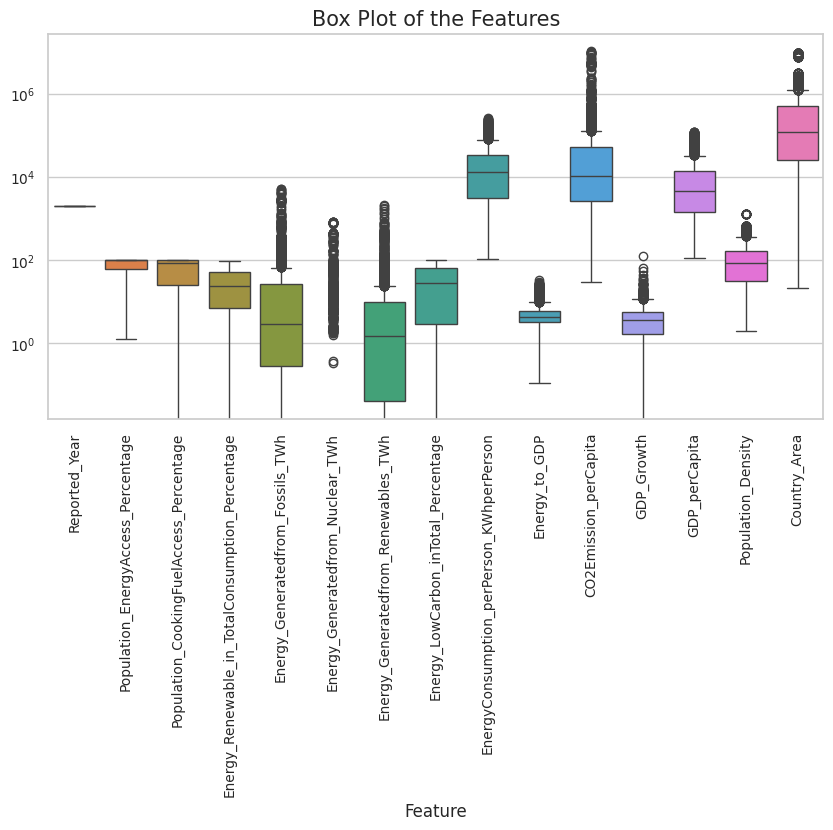

In [ ]:
# Plotting the BoxPlot to visulaize the outliers in the numerical features
sns.set(rc={'figure.figsize':(10,5)}, font_scale=0.9, style='whitegrid')
ax = sns.boxplot(df.iloc[:,0:16])
plt.yscale('log')
plt.xlabel("Feature", fontsize=12)
plt.title("Box Plot of the Features", fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

## **Exploaratory Data Analysis (EDA)**

#### Access to Power over Years

In [ ]:
plot_map(df, 'Population_EnergyAccess_Percentage', 'Access to Energy (% of Population) Over Years')

#### Access to Clean Fuel for Cooking over Years

In [ ]:
plot_map(df, 'Population_CookingFuelAccess_Percentage', 'Access to Clean Fuel for Cooking (% of Population) Over Years')

### Countries ranking highest in average CO2 emissions from 2000 to 2019

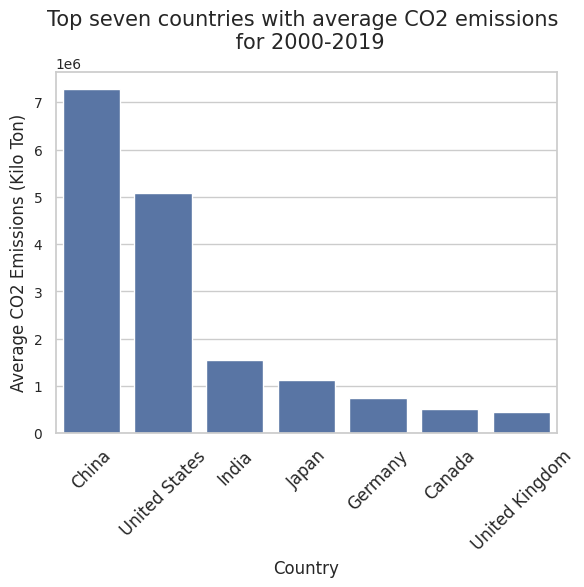

In [ ]:
# Estimate the mean value of CO2 emissions for a country over years
Average_CO2_emission_by_country = df.groupby('Country')['CO2Emission_perCapita'].mean()

# Plot top 7 counties that emit CO2 over years
plt.figure(figsize = (6, 6))
sns.barplot(x = Average_CO2_emission_by_country.nlargest(7).index, y = Average_CO2_emission_by_country.nlargest(7).values)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (Kilo Ton)', fontsize=12)
plt.title('Top seven countries with average CO2 emissions \n for 2000-2019', fontsize=15)

plt.xticks(rotation = 45, ha = 'center', fontsize=12)

plt.tight_layout()
plt.show()

### Countries ranking lowest in average CO2 emissions from 2000 to 2019

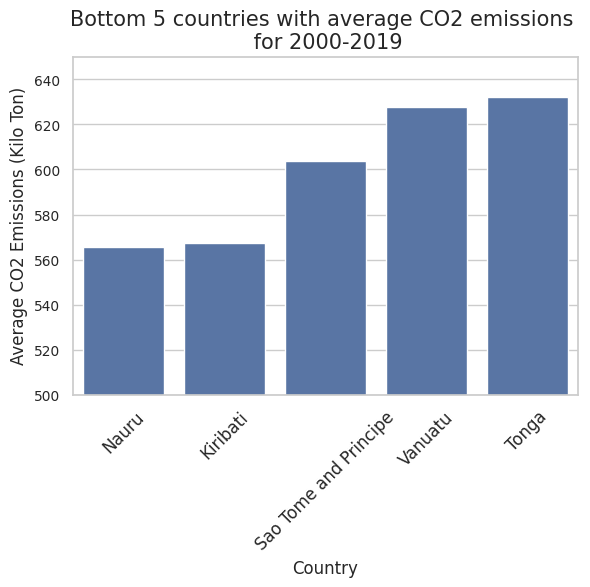

In [ ]:
# Plot bottom 5 counties that emit CO2 over years
plt.figure(figsize = (6, 6))
sns.barplot(x = Average_CO2_emission_by_country.nsmallest(5).index, y = Average_CO2_emission_by_country.nsmallest(5).values)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (Kilo Ton)', fontsize=12)
plt.title('Bottom 5 countries with average CO2 emissions \n for 2000-2019', fontsize=15)
plt.ylim(500, 650)

plt.xticks(rotation = 45, ha = 'center', fontsize=12)

plt.tight_layout()
plt.show()

#### Average growth of CO2 emissions over the years

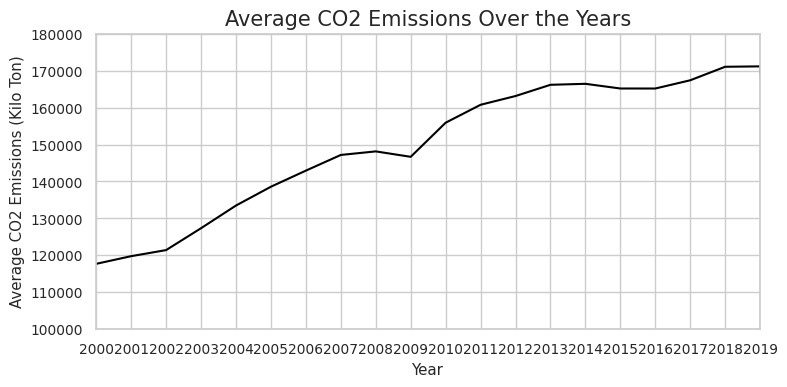

In [ ]:
# Calculate the average CO2 emitted by all counties for Years 2000-2020
Average_CO2_by_year = df.groupby('Reported_Year')['CO2Emission_perCapita'].mean()
Average_CO2_by_year = Average_CO2_by_year.reset_index()
Average_CO2_by_year

plt.figure(figsize = (8, 4))
sns.lineplot(data = Average_CO2_by_year, x = 'Reported_Year', y = 'CO2Emission_perCapita', color = 'black')
plt.title('Average CO2 Emissions Over the Years', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (Kilo Ton)')

plt.xticks(Average_CO2_by_year['Reported_Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later
plt.ylim(1e5, 1.8e5)

plt.tight_layout()
plt.show()

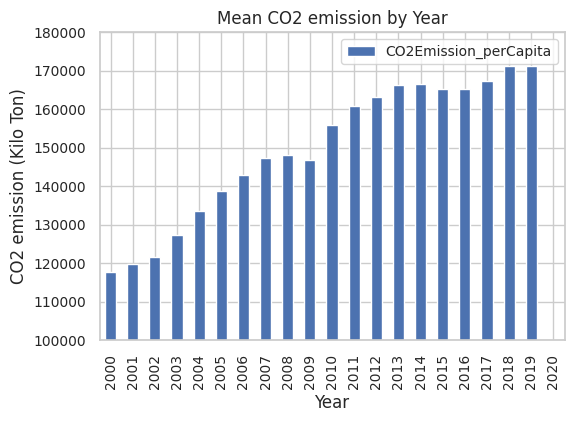

In [ ]:
# Make Plot
df.iloc[:,1:16].groupby(["Reported_Year"]).mean().plot(kind = "bar", y = "CO2Emission_perCapita", stacked = True, figsize = (6,4))

# Set Axis Properties
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Mean CO2 emission by Year', fontsize = 12)
plt.legend(prop={'size': 10})
plt.ylim(1e5, 1.8e5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('CO2 emission (Kilo Ton)', fontsize = 12)
plt.show()

#### Correlation plot of the numerical features

Attributes named, *Country_Latitude* and *Country_Longitude* are not taken into consideration as the values of these attributes should not be changed.

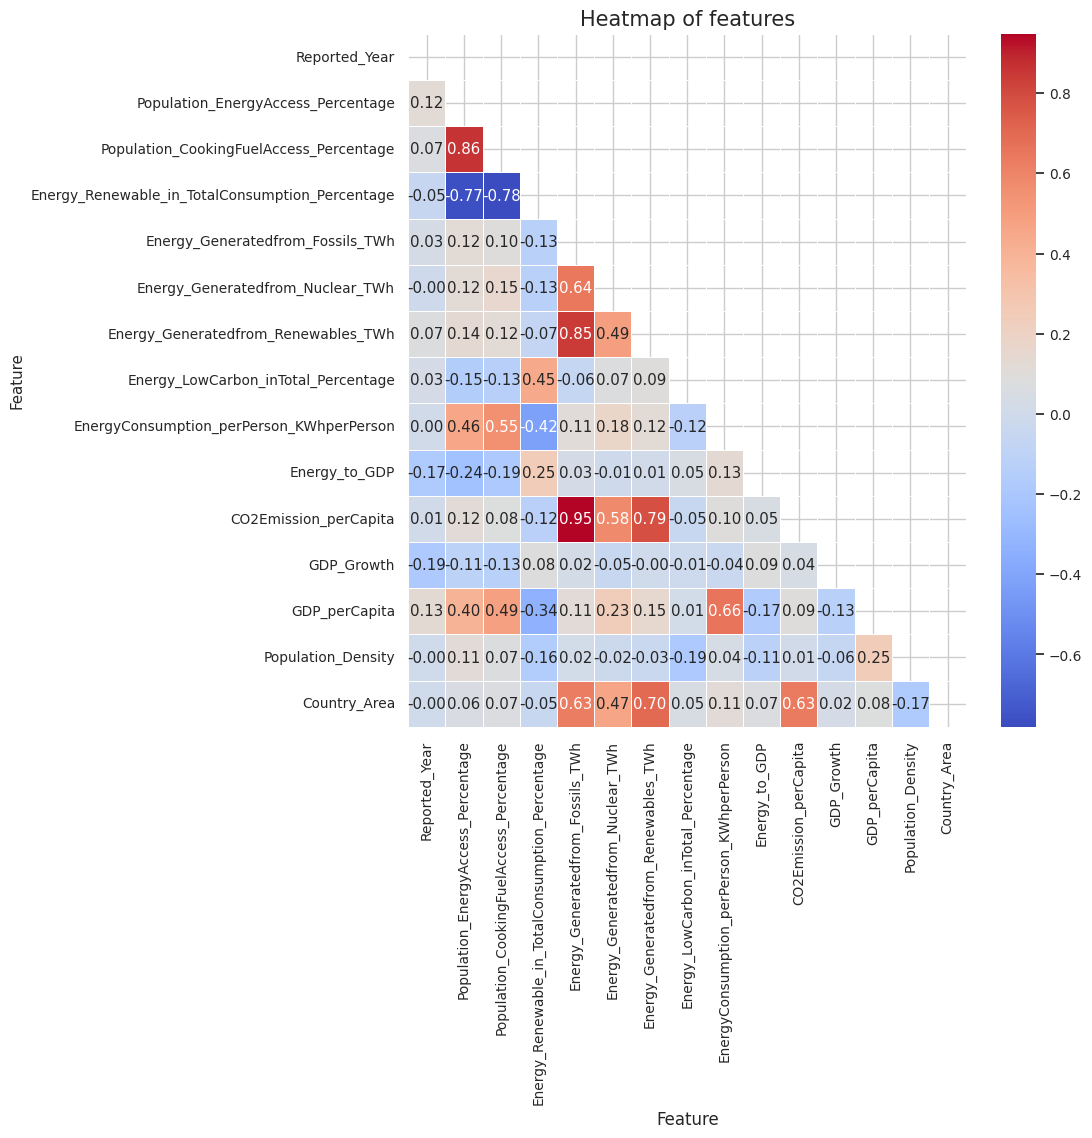

In [ ]:
# Heatmap of all numerical features
fig, axes = plt.subplots(figsize=(9, 9))  # This method creates a figure and a set of subplots
mask = np.triu(np.ones_like(df.iloc[:,1:16].corr()))
sns.heatmap(df.iloc[:,1:16].corr(), annot=True, linewidths=.5, cmap="coolwarm", mask=mask,ax=axes, fmt='.2f')  # Figure out heatmap
plt.title("Heatmap of features", fontsize=15)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Feature")
plt.show()  # Shows only plot and remove other informations

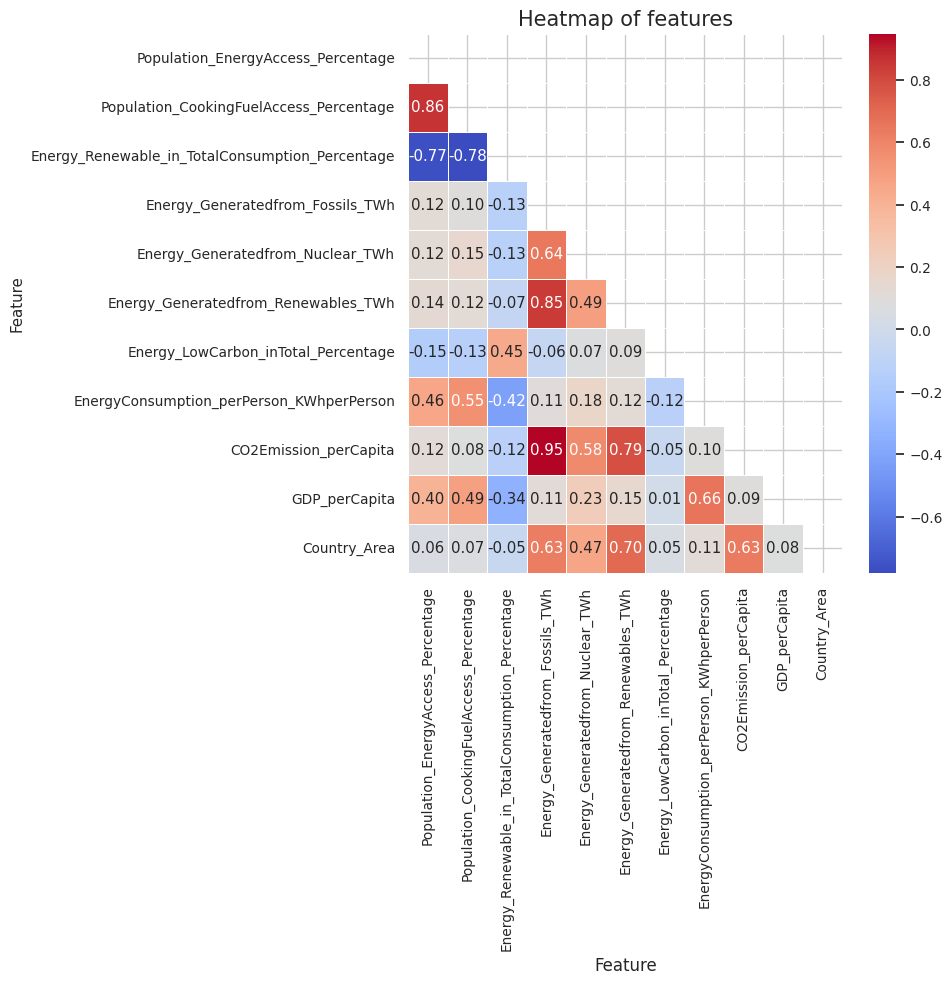

In [ ]:
# Heatmap of reduced number of numerical features
fig, axes = plt.subplots(figsize=(7, 7))  # This method creates a figure and a set of subplots
mask = np.triu(np.ones_like(df.iloc[:,[2,3,4,5,6,7,8,9,11,13,15]].corr()))
sns.heatmap(df.iloc[:,[2,3,4,5,6,7,8,9,11,13,15]].corr(), annot=True, linewidths=.5, cmap="coolwarm", mask=mask,ax=axes, fmt='.2f')  # Figure out heatmap
plt.title("Heatmap of features", fontsize=15)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Feature")
plt.show()  # Shows only plot and remove other informations

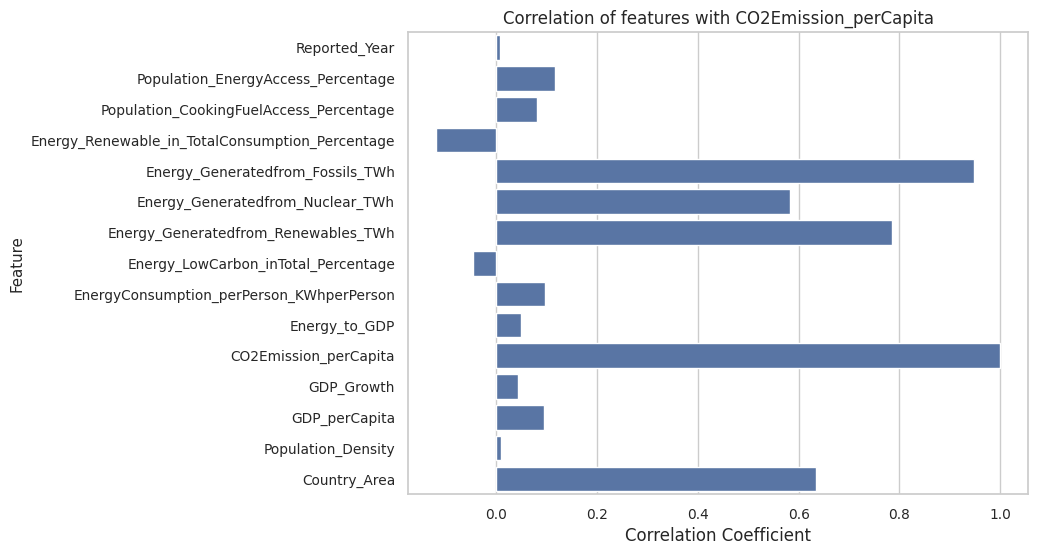

In [ ]:
# Correlation coefficient plot
plt.figure(figsize=(8, 6))
sns.barplot(x = df.iloc[:,1:16].corr()['CO2Emission_perCapita'], y=df.iloc[:,1:16].corr()['CO2Emission_perCapita'].index)
plt.title("Correlation of features with CO2Emission_perCapita", fontsize=12)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature")
plt.show()

In [ ]:
import plotly.express as px

# Aggregate columns by country , year
df_aggregated = df.groupby(['Reported_Year', 'Country']).agg({
    'Energy_Generatedfrom_Fossils_TWh': 'sum',
    'Energy_Generatedfrom_Nuclear_TWh': 'sum',
    'Energy_Generatedfrom_Renewables_TWh': 'sum'
}).reset_index()

# Reshape the df to be useful for sunburst plot
df_melted = df_aggregated.melt(id_vars=['Reported_Year', 'Country'], var_name='Energy Source', value_name='TWh')


fig = px.sunburst(df_melted, path=['Reported_Year', 'Country', 'Energy Source'], values='TWh', title='Energy from all renewable and non -renewable Source in (Twh) by Country by year')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.update_layout(width=1000, height=800)
fig.show()


Takeaways: <br>
1. Energy generated from fossils, nuclear and renewable sources has a strong poistive relation with CO2 emissions.
2. Reduction in CO2 emission is seen with increase in energy generated from renewable sources.

#### Scatter plot to analyze understand the relation between two features

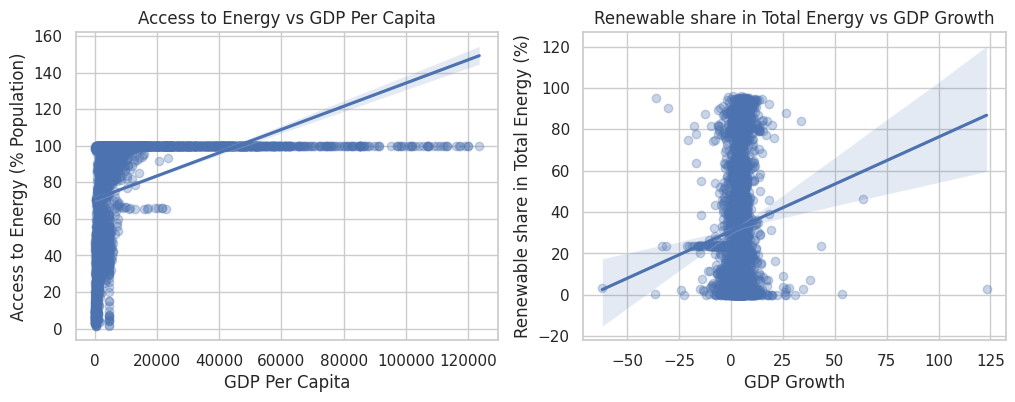

In [ ]:
# Scatterplot of the features
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)
sns.regplot(x='GDP_perCapita', y='Population_EnergyAccess_Percentage', data=df, scatter_kws={'alpha':0.3})
plt.title('Access to Energy vs GDP Per Capita', fontsize=12)
plt.xlabel('GDP Per Capita', fontsize=12)
plt.ylabel('Access to Energy (% Population)', fontsize=12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.subplot(122)
sns.regplot(x='GDP_Growth', y='Energy_Renewable_in_TotalConsumption_Percentage', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable share in Total Energy vs GDP Growth', fontsize=12)
plt.xlabel('GDP Growth', fontsize=12)
plt.ylabel('Renewable share in Total Energy (%)', fontsize=12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()

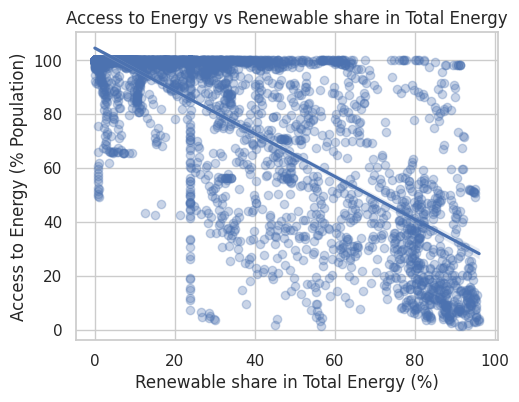

In [ ]:
# Scatterplot of the features
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)
sns.regplot(x='Energy_Renewable_in_TotalConsumption_Percentage', y='Population_EnergyAccess_Percentage', data=df, scatter_kws={'alpha':0.3})
plt.title('Access to Energy vs Renewable share in Total Energy', fontsize=12)
plt.xlabel('Renewable share in Total Energy (%)', fontsize=12)
plt.ylabel('Access to Energy (% Population)', fontsize=12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()

Takeaways: <br>
1. As power access increases, the proportion of renewable energy contribution is declining.

**Sunburst Plot:**
To *understand* the consumption of electricy from renewable energy resources w.r.t every year of each country using sunburst plot

Observations:
from the obserations, we can see that the most common top 5 countries with highest Renewable Energy Share in Total Final Energy Consumption (%):
1.Albania

2.Afghanistan

3.Ethiopia

4.Central-Africa republic

5.Mozambique till year 2006

6.Burundi

## Machine Learning Models

**Objective**: Predict CO2 emissions

### Preparation of data for machine learning models

#### Convert the categorical feature, *Country* to numeric using label encoding

In [ ]:
label_encoder = LabelEncoder()  # Create a instance for the label encoder
encoded_data = pd.DataFrame()  # Create empty DataFrame

# Perform label encoding on categorical attribute named, *Country*
df['Country'] = label_encoder.fit_transform(df['Country'])

# Display the statistical characteristics of Country attribute
df['Country'].describe()

count    3627.000000
mean       86.144472
std        50.227481
min         0.000000
25%        43.000000
50%        86.000000
75%       129.000000
max       173.000000
Name: Country, dtype: float64

In [ ]:
# Display the first five tuples after label encoding the feature named Country
df.head()

Country  Reported_Year  Population_EnergyAccess_Percentage  \
0        0           2000                            1.613591   
1        0           2001                            4.074574   
2        0           2002                            9.409158   
3        0           2003                           14.738506   
4        0           2004                           20.064968   

   Population_CookingFuelAccess_Percentage  \
0                                      6.2   
1                                      7.2   
2                                      8.2   
3                                      9.5   
4                                     10.9   

   Energy_Renewable_in_TotalConsumption_Percentage  \
0                                            44.99   
1                                            45.60   
2                                            37.83   
3                                            36.66   
4                                            44.24   

   Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
0                              0.16                               0.0   
1                              0.09                               0.0   
2                              0.13                               0.0   
3                              0.31                               0.0   
4                              0.33                               0.0   

   Energy_Generatedfrom_Renewables_TWh  Energy_LowCarbon_inTotal_Percentage  \
0                                 0.31                            65.957440   
1                                 0.50                            84.745766   
2                                 0.56                            81.159424   
3                                 0.63                            67.021280   
4                                 0.56                            62.921350   

   EnergyConsumption_perPerson_KWhperPerson  Energy_to_GDP  \
0                                 302.59482           1.64   
1                                 236.89185           1.74   
2                                 210.86215           1.40   
3                                 229.96822           1.40   
4                                 204.23125           1.20   

   CO2Emission_perCapita  GDP_Growth  GDP_perCapita  Population_Density  \
0             760.000000    3.571204    4620.837370                60.0   
1             730.000000    3.571204    4620.837370                60.0   
2            1029.999971    3.571204     179.426579                60.0   
3            1220.000029    8.832278     190.683814                60.0   
4            1029.999971    1.414118     211.382074                60.0   

   Country_Area  Country_Latitude  Country_Longitude  
0      652230.0          33.93911          67.709953  
1      652230.0          33.93911          67.709953  
2      652230.0          33.93911          67.709953  
3      652230.0          33.93911          67.709953  
4      652230.0          33.93911          67.709953

#### Divide the data into two data frames, one of training and testing the machine learning model for CO2 emissions for the year 2000 to 2019 and the other to pedict the CO2 emissions for the year 2020

In [ ]:
# Data frame for the year 2020 to predict CO2 emissions
df1 = df[df["Reported_Year"] == 2020]

# Data frame for the year 2000 to 2019 to train the machine learning model for CO2 emissions
df = df[df["Reported_Year"] != 2020]

In [ ]:
df

Country  Reported_Year  Population_EnergyAccess_Percentage  \
0           0           2000                            1.613591   
1           0           2001                            4.074574   
2           0           2002                            9.409158   
3           0           2003                           14.738506   
4           0           2004                           20.064968   
...       ...            ...                                 ...   
3643      173           2015                           33.700000   
3644      173           2016                           42.561730   
3645      173           2017                           44.178635   
3646      173           2018                           45.572647   
3647      173           2019                           46.781475   

      Population_CookingFuelAccess_Percentage  \
0                                         6.2   
1                                         7.2   
2                                         8.2   
3                                         9.5   
4                                        10.9   
...                                       ...   
3643                                     29.5   
3644                                     29.8   
3645                                     29.8   
3646                                     29.9   
3647                                     30.1   

      Energy_Renewable_in_TotalConsumption_Percentage  \
0                                               44.99   
1                                               45.60   
2                                               37.83   
3                                               36.66   
4                                               44.24   
...                                               ...   
3643                                            80.82   
3644                                            81.90   
3645                                            82.46   
3646                                            80.23   
3647                                            81.50   

      Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
0                                 0.16                               0.0   
1                                 0.09                               0.0   
2                                 0.13                               0.0   
3                                 0.31                               0.0   
4                                 0.33                               0.0   
...                                ...                               ...   
3643                              4.02                               0.0   
3644                              3.50                               0.0   
3645                              3.05                               0.0   
3646                              3.73                               0.0   
3647                              3.66                               0.0   

      Energy_Generatedfrom_Renewables_TWh  \
0                                    0.31   
1                                    0.50   
2                                    0.56   
3                                    0.63   
4                                    0.56   
...                                   ...   
3643                                 5.37   
3644                                 3.32   
3645                                 4.30   
3646                                 5.46   
3647                                 4.58   

      Energy_LowCarbon_inTotal_Percentage  \
0                               65.957440   
1                               84.745766   
2                               81.159424   
3                               67.021280   
4                               62.921350   
...                                   ...   
3643                            57.188496   
3644                            48.680350   
3645                            58.503407   
3646       

In [ ]:
df1

Country  Reported_Year  Population_EnergyAccess_Percentage  \
20          0           2020                           97.700000   
41          1           2020                          100.000000   
62          2           2020                           99.804130   
83          3           2020                           46.890610   
104         4           2020                          100.000000   
...       ...            ...                                 ...   
3564      169           2020                          100.000000   
3585      170           2020                           67.333270   
3606      171           2020                           73.757930   
3627      172           2020                           44.524475   
3648      173           2020                           52.747670   

      Population_CookingFuelAccess_Percentage  \
20                                      33.20   
41                                      81.30   
62                                      99.70   
83                                      50.20   
104                                    100.00   
...                                       ...   
3564                                    84.25   
3585                                     7.60   
3606                                    61.50   
3627                                    10.40   
3648                                    30.40   

      Energy_Renewable_in_TotalConsumption_Percentage  \
20                                             23.765   
41                                             23.765   
62                                             23.765   
83                                             23.765   
104                                            23.765   
...                                               ...   
3564                                           23.765   
3585                                           23.765   
3606                                           23.765   
3627                                           23.765   
3648                                           81.900   

      Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
20                                0.12                               0.0   
41                                0.00                               0.0   
62                               72.01                               0.0   
83                                4.49                               0.0   
104                               0.31                               0.0   
...                                ...                               ...   
3564                             50.93                               0.0   
3585                              0.05                               0.0   
3606                              2.74                               0.0   
3627                              2.00                               0.0   
3648                              3.40                               0.0   

      Energy_Generatedfrom_Renewables_TWh  \
20                                   0.68   
41                                   5.31   
62                                   0.72   
83                                  12.10   
104                                  0.02   
...                                   ...   
3564                                 5.01   
3585                                 0.02   
3606                                 0.49   
3627                                13.10   
3648                                 4.19   

      Energy_LowCarbon_inTotal_Percentage  \
20                              85.000000   
41                             100.000000   
62                               0.989963   
83                              72.935500   
104                              6.060606   
...                                   ...   
3564                             8.956025   
3585                            28.571428   
3606                            15.170279   
3627       

#### Feature Selection - Slection of top 6 features influencing the CO2 emission using KNN

In [ ]:
# Assuming 'df' is your DataFrame containing the features and target
X = df.drop(columns=['CO2Emission_perCapita', 'Reported_Year', 'Country_Latitude', 'Country_Longitude',])
y = df['CO2Emission_perCapita']

# Select top 6 features
selector = SelectKBest(score_func=f_regression, k=6)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support(indices=True)].tolist()

print("Selected Features:")
print(selected_feature_names)

Selected Features:
['Population_EnergyAccess_Percentage', 'Energy_Renewable_in_TotalConsumption_Percentage', 'Energy_Generatedfrom_Fossils_TWh', 'Energy_Generatedfrom_Nuclear_TWh', 'Energy_Generatedfrom_Renewables_TWh', 'Country_Area']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3453 entries, 0 to 3647
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          3453 non-null   int64  
 1   Reported_Year                                    3453 non-null   int64  
 2   Population_EnergyAccess_Percentage               3453 non-null   float64
 3   Population_CookingFuelAccess_Percentage          3453 non-null   float64
 4   Energy_Renewable_in_TotalConsumption_Percentage  3453 non-null   float64
 5   Energy_Generatedfrom_Fossils_TWh                 3453 non-null   float64
 6   Energy_Generatedfrom_Nuclear_TWh                 3453 non-null   float64
 7   Energy_Generatedfrom_Renewables_TWh              3453 non-null   float64
 8   Energy_LowCarbon_inTotal_Percentage              3453 non-null   float64
 9   EnergyConsumption_perPerson_KWhperP

In [ ]:
# Select the six features obtained for KNN feature selection method
df_F1 = df.iloc[:,[2,4,5,6,7,15]]

### Model Training

#### Perform min max feature scaling on the data that is used for training the model.

In [ ]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df))

In [ ]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_minmax_scaled.iloc[:,[2,4,5,6,7,15]] , df_minmax_scaled.iloc[:,11], test_size=0.2, random_state=42)


# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = LR.predict(X_train)
# Predict target variable from test data
y_test_pred = LR.predict(X_test)
# Evaluate performance metric
[LR_RMSE_Train, LR_RMSE_Test, LR_R2_Train, LR_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)


# KNN Regression
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = KNN.predict(X_train)
# Predict target variable from test data
y_test_pred = KNN.predict(X_test)
# Evaluate performance metric
[KNN_RMSE_Train, KNN_RMSE_Test, KNN_R2_Train, KNN_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# SVM  with Linear Kernel Regression
SVR_L = SVR(kernel = 'linear')
SVR_L.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = SVR_L.predict(X_train)
# Predict target variable from test data
y_test_pred = SVR_L.predict(X_test)
# Evaluate performance metric
[SVR_L_RMSE_Train, SVR_L_RMSE_Test, SVR_L_R2_Train, SVR_L_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# SVM with Non-Linear Kernel Regression
SVR_NL = SVR(kernel = 'rbf')
SVR_NL.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = SVR_NL.predict(X_train)
# Predict target variable from test data
y_test_pred = SVR_NL.predict(X_test)
# Evaluate performance metric
[SVR_NL_RMSE_Train, SVR_NL_RMSE_Test, SVR_NL_R2_Train, SVR_NL_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# Decision Tree Regressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = DTR.predict(X_train)
# Predict target variable from test data
y_test_pred = DTR.predict(X_test)
# Evaluate performance metric
[DTR_RMSE_Train, DTR_RMSE_Test, DTR_R2_Train, DTR_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# Random Forest Regression
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = RF.predict(X_train)
# Predict target variable from test data
y_test_pred = RF.predict(X_test)
# Evaluate performance metric
[RF_RMSE_Train, RF_RMSE_Test, RF_R2_Train, RF_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# XGB Regression
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = XGB.predict(X_train)
# Predict target variable from test data
y_test_pred = XGB.predict(X_test)
# Evaluate performance metric
[XGB_RMSE_Train, XGB_RMSE_Test, XGB_R2_Train, XGB_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# Tabulate performance metrics of machine learning models
headers = ['Model', 'Hyperparameters', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2']
results = [
    ['Linear Regression', 'Default', LR_RMSE_Train, LR_RMSE_Test, LR_R2_Train, LR_R2_Test],
    ['KNN Regression', 'Default', KNN_RMSE_Train, KNN_RMSE_Test, KNN_R2_Train, KNN_R2_Test],
    ['SVM with Linear Kernel Regression', 'Default', SVR_L_RMSE_Train, SVR_L_RMSE_Test, SVR_L_R2_Train, SVR_L_R2_Test],
    ['SVM with Non-linear Kernel Regression', 'Default', SVR_NL_RMSE_Train, SVR_NL_RMSE_Test, abs(SVR_NL_R2_Train), SVR_NL_R2_Test],
    ['Decision Tree Regression', 'Default', DTR_RMSE_Train, DTR_RMSE_Test, DTR_R2_Train, DTR_R2_Test],
    ['Random Forest Regression', 'Default', RF_RMSE_Train, RF_RMSE_Test, RF_R2_Train, RF_R2_Test],
    ['XGBoost Regression', 'Default', XGB_RMSE_Train, XGB_RMSE_Test, XGB_R2_Train, XGB_R2_Test]
]

# Printing the performance metric table
print(tabulate(results, headers=headers))

Model                                  Hyperparameters      Train RMSE    Test RMSE    Train R2    Test R2
-------------------------------------  -----------------  ------------  -----------  ----------  ---------
Linear Regression                      Default                   0.009        0.01        0.983      0.982
KNN Regression                         Default                   0.003        0.006       0.998      0.994
SVM with Linear Kernel Regression      Default                   0.046        0.048       0.554      0.558
SVM with Non-linear Kernel Regression  Default                   0.071        0.071       0.055      0.019
Decision Tree Regression               Default                   0            0.008       1          0.986
Random Forest Regression               Default                   0.003        0.006       0.998      0.993
XGBoost Regression                     Default                   0.001        0.016       1          0.95


#### Perform feature scaling on the data that is used for training the model. Robust scaling is selected as the data contain good number of outliers

In [ ]:
# Perform robust-scaling
scaler_robust = RobustScaler()
df_scaled = pd.DataFrame(scaler_robust.fit_transform(df))

In [ ]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:,[2,4,5,6,7,15]] , df_scaled.iloc[:,11], test_size=0.2, random_state=42)


# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = LR.predict(X_train)
# Predict target variable from test data
y_test_pred = LR.predict(X_test)
# Evaluate performance metric
[LR_RMSE_Train, LR_RMSE_Test, LR_R2_Train, LR_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)


# KNN Regression
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = KNN.predict(X_train)
# Predict target variable from test data
y_test_pred = KNN.predict(X_test)
# Evaluate performance metric
[KNN_RMSE_Train, KNN_RMSE_Test, KNN_R2_Train, KNN_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# SVM  with Linear Kernel Regression
SVR_L = SVR(kernel = 'linear')
SVR_L.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = SVR_L.predict(X_train)
# Predict target variable from test data
y_test_pred = SVR_L.predict(X_test)
# Evaluate performance metric
[SVR_L_RMSE_Train, SVR_L_RMSE_Test, SVR_L_R2_Train, SVR_L_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# SVM with Non-Linear Kernel Regression
SVR_NL = SVR(kernel = 'rbf')
SVR_NL.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = SVR_NL.predict(X_train)
# Predict target variable from test data
y_test_pred = SVR_NL.predict(X_test)
# Evaluate performance metric
[SVR_NL_RMSE_Train, SVR_NL_RMSE_Test, SVR_NL_R2_Train, SVR_NL_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# Decision Tree Regressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = DTR.predict(X_train)
# Predict target variable from test data
y_test_pred = DTR.predict(X_test)
# Evaluate performance metric
[DTR_RMSE_Train, DTR_RMSE_Test, DTR_R2_Train, DTR_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# Random Forest Regression
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = RF.predict(X_train)
# Predict target variable from test data
y_test_pred = RF.predict(X_test)
# Evaluate performance metric
[RF_RMSE_Train, RF_RMSE_Test, RF_R2_Train, RF_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# XGB Regression
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
# Predict target variable from train data
y_train_pred = XGB.predict(X_train)
# Predict target variable from test data
y_test_pred = XGB.predict(X_test)
# Evaluate performance metric
[XGB_RMSE_Train, XGB_RMSE_Test, XGB_R2_Train, XGB_R2_Test] = Regression_PM(y_train_pred, y_train, y_test_pred, y_test)

# Tabulate performance metrics of machine learning models
headers = ['Model', 'Hyperparameters', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2']
results = [
    ['Linear Regression', 'Default', LR_RMSE_Train, LR_RMSE_Test, LR_R2_Train, LR_R2_Test],
    ['KNN Regression', 'Default', KNN_RMSE_Train, KNN_RMSE_Test, KNN_R2_Train, KNN_R2_Test],
    ['SVM with Linear Kernel Regression', 'Default', SVR_L_RMSE_Train, SVR_L_RMSE_Test, SVR_L_R2_Train, SVR_L_R2_Test],
    ['SVM with Non-linear Kernel Regression', 'Default', SVR_NL_RMSE_Train, SVR_NL_RMSE_Test, SVR_NL_R2_Train, SVR_NL_R2_Test],
    ['Decision Tree Regression', 'Default', DTR_RMSE_Train, DTR_RMSE_Test, DTR_R2_Train, DTR_R2_Test],
    ['Random Forest Regression', 'Default', RF_RMSE_Train, RF_RMSE_Test, RF_R2_Train, RF_R2_Test],
    ['XGBoost Regression', 'Default', XGB_RMSE_Train, XGB_RMSE_Test, XGB_R2_Train, XGB_R2_Test]
]


# Ensemble model
#Split the data into training and testing


# Define the individual models
models = [
    ('LR', LinearRegression()),
    ('KNN', KNeighborsRegressor()),
    ('SVR_L', SVR(kernel='linear')),
    ('SVR_NL', SVR(kernel='rbf')),
    ('DTR', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('XGB', XGBRegressor())
]


In [ ]:
df1_scaled = pd.DataFrame(scaler_robust.fit_transform(df1))
df1_scaled_en = pd.DataFrame(df1_scaled, columns=['2', '4', '5', '6', '7', '15'])

In [ ]:
# Create the ensemble model
ensemble_model = VotingRegressor(estimators=models)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)

# Evaluate performance metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Define the performance metrics
metrics = [
    ['Train RMSE', train_rmse],
    ['Test RMSE', test_rmse],
    ['Train R2', train_r2],
    ['Test R2', test_r2]
]

# Print the metrics using tabulate
print(tabulate(metrics, headers=['Metric', 'Value']))

X_predict_columns = ['2', '4', '5', '6', '7', '15']  # Assuming these are the column names you want to select

# Selecting specific columns from df1
X_predict = df1.iloc[:, [2, 4, 5, 6, 7, 15]]

# Assigning column names to X_predict
X_predict.columns = X_predict_columns

# Use the ensemble model to predict CO2 emissions
y_predict_ens = ensemble_model.predict(X_predict)

# Print the predicted CO2 emissions
# Assuming df1 has a 'Country' column
predictions_df = pd.DataFrame({'Country': df1['Country'], 'Predicted_CO2_Emissions': y_predict_ens})
print('Predctions from Ensemble: ',predictions_df)



Metric         Value
----------  --------
Train RMSE  1.97382
Test RMSE   2.22051
Train R2    0.979746
Test R2     0.975903
Predctions from Ensemble:        Country  Predicted_CO2_Emissions
20          0             23015.762066
41          1              1020.390770
62          2             84091.674964
83          3             43991.489701
104         4                23.208327
...       ...                      ...
3564      169             15837.988150
3585      170               435.426424
3606      171             18633.888700
3627      172             26559.009100
3648      173             13794.632233

[174 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVR was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVR was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [ ]:
# Printing the performance metric table
print(tabulate(results, headers=headers))

Model                                  Hyperparameters      Train RMSE    Test RMSE    Train R2    Test R2
-------------------------------------  -----------------  ------------  -----------  ----------  ---------
Linear Regression                      Default                   1.828        1.915       0.983      0.982
KNN Regression                         Default                   0.809        1.428       0.997      0.99
SVM with Linear Kernel Regression      Default                   2.198        2.237       0.975      0.976
SVM with Non-linear Kernel Regression  Default                  11.227       11.337       0.345      0.372
Decision Tree Regression               Default                   0            0.915       1          0.996
Random Forest Regression               Default                   0.564        1.206       0.998      0.993
XGBoost Regression                     Default                   0.037        3.188       1          0.95


###Predicting Co2Emissions_perCapita for Year 2020

Perform feature scaling on the data that is used for training the model. Robust scaling is selected as the data contain good number of outliers

In [ ]:
# Perform robust-scaling only on the best features that were selected above
scaler_robust = RobustScaler()
df1_scaled = pd.DataFrame(scaler_robust.fit_transform(df1.iloc[:, [2,4,5,6,7,15]]))

Prediction of dataframe df1 using the best model: Decision Tree Regression

In [ ]:
# Select the features for prediction
selected_features = df1_scaled

# Predict CO2 emissions for df1 using the decision tree regressor
df1['CO2Emission_perCapita_DTR'] = DTR.predict(selected_features)


Displaying the output for the Decision Tree Regression Model

In [ ]:
print("Decision Tree Regression:", df1['CO2Emission_perCapita_DTR'].loc[df1['Reported_Year'] == 2020].values) # Print the output for Decision Tree Regression model


Decision Tree Regression: [-1.17186044e-01 -1.04123909e-01  2.71599181e+00  2.52472466e-01
  0.00000000e+00  6.77197233e+00 -1.32860611e-01  0.00000000e+00
  8.15861155e+00  4.67064736e-01  3.15543918e-01 -1.54693042e-01
  5.85930194e-01  2.12054483e+00  0.00000000e+00  5.75853721e-01
  1.54767684e+00 -1.91453630e-01 -7.18417672e-02 -1.99290913e-01
 -1.07669344e-01  2.04515764e-01 -1.33594759e-01  6.77197233e+00
  2.99122959e-01 -1.31181192e-01 -1.92573242e-01 -4.01194352e-02
 -5.87796237e-02  6.77197233e+00  0.00000000e+00 -1.17186044e-01
 -1.36406047e-01  1.06288485e+00  1.84063071e+02  1.34278781e+00
 -1.98731107e-01  7.89326265e-02 -1.07669344e-01  4.45978604e-02
  2.19443908e-01 -8.00522551e-02  1.59675310e+00  1.17372641e-01
 -1.92573242e-01 -1.99290913e-01  1.83989540e-01  3.26553437e-01
  0.00000000e+00 -1.20918089e-01 -1.18119057e-01 -1.87348387e-01
 -4.81433080e-02 -1.98731107e-01  7.93058390e-02 -1.91453630e-01
  5.68202972e-01  6.82981885e+00 -1.53760031e-01  0.00000000e+00

###Output for Decision Tree Regression model

In [ ]:
df_copy['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

In [ ]:
df1.head()

Country  Reported_Year  Population_EnergyAccess_Percentage  \
20         0           2020                            97.70000   
41         1           2020                           100.00000   
62         2           2020                            99.80413   
83         3           2020                            46.89061   
104        4           2020                           100.00000   

     Population_CookingFuelAccess_Percentage  \
20                                      33.2   
41                                      81.3   
62                                      99.7   
83                                      50.2   
104                                    100.0   

     Energy_Renewable_in_TotalConsumption_Percentage  \
20                                            23.765   
41                                            23.765   
62                                            23.765   
83                                            23.765   
104                                           23.765   

     Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
20                               0.12                               0.0   
41                               0.00                               0.0   
62                              72.01                               0.0   
83                               4.49                               0.0   
104                              0.31                               0.0   

     Energy_Generatedfrom_Renewables_TWh  Energy_LowCarbon_inTotal_Percentage  \
20                                  0.68                            85.000000   
41                                  5.31                           100.000000   
62                                  0.72                             0.989963   
83                                 12.10                            72.935500   
104                                 0.02                             6.060606   

     EnergyConsumption_perPerson_KWhperPerson  Energy_to_GDP  \
20                                    702.888          4.315   
41                                  11158.003          4.315   
62                                  14933.807          4.315   
83                                   3527.160          4.315   
104                                 27785.227          4.315   

     CO2Emission_perCapita  GDP_Growth  GDP_perCapita  Population_Density  \
20             10720.00027   -2.351101     516.747871                60.0   
41             10720.00027   -3.955398    5246.292306               105.0   
62             10720.00027   -5.100000    3306.858208                18.0   
83             10720.00027   -5.399987    1776.166868                26.0   
104            10720.00027  -20.192371   13992.744480               223.0   

     Country_Area  Country_Latitude  Country_Longitude  \
20       652230.0         33.939110          67.709953   
41        28748.0         41.153332          20.168331   
62      2381741.0         28.033886           1.659626   
83      1246700.0        -11.202692          17.873887   
104         443.0         17.060816         -61.796428   

     CO2Emission_perCapita_DTR  
20                   -0.117186  
41                   -0.104124  
62                    2.715992  
83                    0.252472  
104                   0.000000

In [ ]:
# Print the output for Decision Tree Regression model
print("Decision Tree Regression:", df1['CO2Emission_perCapita_DTR'])

Decision Tree Regression: 20     -0.117186
41     -0.104124
62      2.715992
83      0.252472
104     0.000000
          ...   
3564    1.334391
3585   -0.198731
3606   -0.111356
3627   -0.044784
3648    0.059339
Name: CO2Emission_perCapita_DTR, Length: 174, dtype: float64


In [ ]:
label_encoder = LabelEncoder()  # Create a instance for the label encoder
# Perform label encoding on categorical attribute named, *Country*
# df1['Country'] = label_encoder.fit_transform(df1['Country'])

In [ ]:
#Country_encoded1= df_copy['Entity'].unique() #plan is to add this to the DT_pred dataframe in next one, and then index to get predicted values

# Country_encoded1 which is based on df_copy is 176 rows
# DT_pred shape is 174, which is based on predictions

In [ ]:
DT_pred = df1['CO2Emission_perCapita_DTR']
DT_pred = pd.DataFrame(DT_pred) #new dataframw with just the predicted valued y

DT_pred['Country'] = df1['Country']

#DT_pred['Country_encoded'] = Country_encoded1

In [ ]:
DT_pred['Country_index'] = df1['Country']
DT_pred
DT_pred.set_index('Country_index', inplace=True)

In [ ]:
DT_pred.iloc[74] #india

CO2Emission_perCapita_DTR     9.453256
Country                      74.000000
Name: 74, dtype: float64

In [ ]:
DT_pred.iloc[168] #UK

CO2Emission_perCapita_DTR     -0.065871
Country                      168.000000
Name: 168, dtype: float64

In [ ]:
DT_pred.iloc[169] #USA

CO2Emission_perCapita_DTR      1.334391
Country                      169.000000
Name: 169, dtype: float64

In [ ]:
# Prepare the data for tabulation
table_data = [["Decision Tree Regression", df1['CO2Emission_perCapita_DTR'].values[0]]]

# Print the tabulated data as a single column
print(tabulate(table_data, tablefmt="plain"))

Decision Tree Regression  -0.117186


Plotting the Co2 Emissions Graph for the Three Countries India,USA and UK

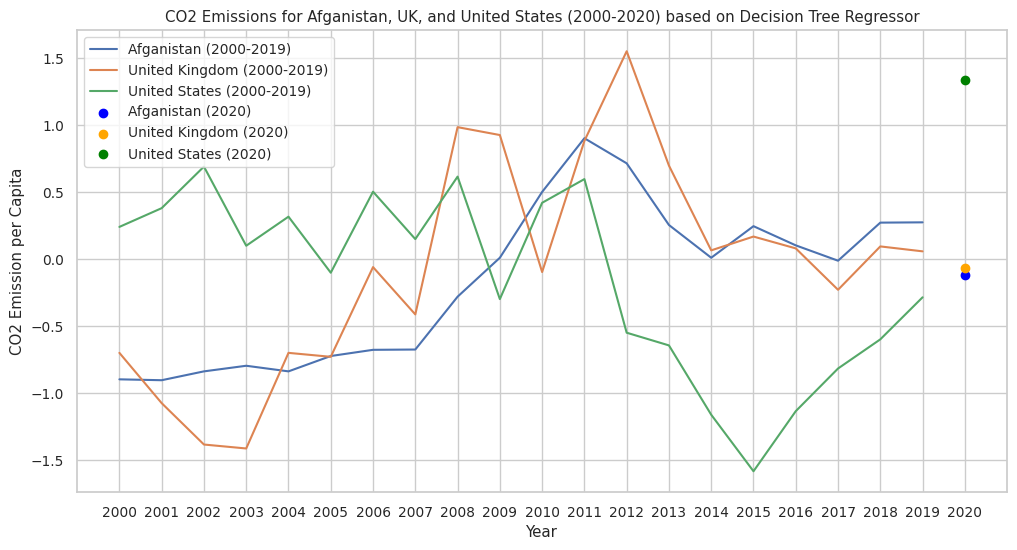

In [221]:
# Filter data for India, UK, and United States from df
Afg_data = df.loc[df['Country'] == 0] #becasue of label encoded value passing the distinct country number assocaited to each countries label
uk_data = df.loc[df['Country'] == 168.0]
us_data = df.loc[df['Country'] == 169.0]

# Filter data for India, UK, and United States from df1 for the year 2020
Afg_data_2020 = df1[(df1['Country'] == 0) & (df1['Reported_Year'] == 2020.0)]
uk_data_2020 = df1[(df1['Country'] == 168.0) & (df1['Reported_Year'] == 2020.0)]
us_data_2020 = df1[(df1['Country'] == 169.0) & (df1['Reported_Year'] == 2020.0)]

# Making the 2000-2019 values scaled to better compare final output
Afg_data_scaled = pd.DataFrame(scaler_robust.fit_transform(Afg_data), columns = df.columns)
uk_data_scaled = pd.DataFrame(scaler_robust.fit_transform(uk_data), columns = df.columns)
us_data_scaled = pd.DataFrame(scaler_robust.fit_transform(us_data), columns = df.columns)

# Plotting till 2019
plt.figure(figsize=(12, 6))
plt.plot(Afg_data['Reported_Year'], Afg_data_scaled['CO2Emission_perCapita'], label='Afganistan (2000-2019)')
plt.plot(uk_data['Reported_Year'], uk_data_scaled['CO2Emission_perCapita'], label='United Kingdom (2000-2019)')
plt.plot(us_data['Reported_Year'], us_data_scaled['CO2Emission_perCapita'], label='United States (2000-2019)')

# Plotting 2020
plt.scatter(2020, Afg_data_2020['CO2Emission_perCapita_DTR'], color='blue', label='Afganistan (2020)')
plt.scatter(2020, uk_data_2020['CO2Emission_perCapita_DTR'], color='orange', label='United Kingdom (2020)')
plt.scatter(2020, us_data_2020['CO2Emission_perCapita_DTR'], color='green', label='United States (2020)')

plt.xticks(range(2000, 2021))
plt.xlabel('Year')
plt.ylabel('CO2 Emission per Capita')
plt.title('CO2 Emissions for Afganistan, UK, and United States (2000-2020) based on Decision Tree Regressor')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df1

Country  Reported_Year  Population_EnergyAccess_Percentage  \
20          0           2020                           97.700000   
41          1           2020                          100.000000   
62          2           2020                           99.804130   
83          3           2020                           46.890610   
104         4           2020                          100.000000   
...       ...            ...                                 ...   
3564      169           2020                          100.000000   
3585      170           2020                           67.333270   
3606      171           2020                           73.757930   
3627      172           2020                           44.524475   
3648      173           2020                           52.747670   

      Population_CookingFuelAccess_Percentage  \
20                                      33.20   
41                                      81.30   
62                                      99.70   
83                                      50.20   
104                                    100.00   
...                                       ...   
3564                                    84.25   
3585                                     7.60   
3606                                    61.50   
3627                                    10.40   
3648                                    30.40   

      Energy_Renewable_in_TotalConsumption_Percentage  \
20                                             23.765   
41                                             23.765   
62                                             23.765   
83                                             23.765   
104                                            23.765   
...                                               ...   
3564                                           23.765   
3585                                           23.765   
3606                                           23.765   
3627                                           23.765   
3648                                           81.900   

      Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
20                                0.12                               0.0   
41                                0.00                               0.0   
62                               72.01                               0.0   
83                                4.49                               0.0   
104                               0.31                               0.0   
...                                ...                               ...   
3564                             50.93                               0.0   
3585                              0.05                               0.0   
3606                              2.74                               0.0   
3627                              2.00                               0.0   
3648                              3.40                               0.0   

      Energy_Generatedfrom_Renewables_TWh  \
20                                   0.68   
41                                   5.31   
62                                   0.72   
83                                  12.10   
104                                  0.02   
...                                   ...   
3564                                 5.01   
3585                                 0.02   
3606                                 0.49   
3627                                13.10   
3648                                 4.19   

      Energy_LowCarbon_inTotal_Percentage  \
20                              85.000000   
41                             100.000000   
62                               0.989963   
83                              72.935500   
104                              6.060606   
...                                   ...   
3564                             8.956025   
3585                            28.571428   
3606                            15.170279   
3627       

In [ ]:
uk_data_2020

Country  Reported_Year  Population_EnergyAccess_Percentage  \
3543      168           2020                               100.0   

      Population_CookingFuelAccess_Percentage  \
3543                                    100.0   

      Energy_Renewable_in_TotalConsumption_Percentage  \
3543                                           23.765   

      Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
3543                               2.4                               0.0   

      Energy_Generatedfrom_Renewables_TWh  \
3543                                11.14   

      Energy_LowCarbon_inTotal_Percentage  \
3543                             82.27474   

      EnergyConsumption_perPerson_KWhperPerson  Energy_to_GDP  \
3543                                  17631.44          4.315   

      CO2Emission_perCapita  GDP_Growth  GDP_perCapita  Population_Density  \
3543            10720.00027   -5.858721    15438.41167                20.0   

      Country_Area  Country_Latitude  Country_Longitude  \
3543      176215.0        -32.522779         -55.765835   

      CO2Emission_perCapita_DTR  
3543                  -0.065871

In [ ]:
us_data_2020

Country  Reported_Year  Population_EnergyAccess_Percentage  \
3564      169           2020                               100.0   

      Population_CookingFuelAccess_Percentage  \
3564                                    84.25   

      Energy_Renewable_in_TotalConsumption_Percentage  \
3564                                           23.765   

      Energy_Generatedfrom_Fossils_TWh  Energy_Generatedfrom_Nuclear_TWh  \
3564                             50.93                               0.0   

      Energy_Generatedfrom_Renewables_TWh  \
3564                                 5.01   

      Energy_LowCarbon_inTotal_Percentage  \
3564                             8.956025   

      EnergyConsumption_perPerson_KWhperPerson  Energy_to_GDP  \
3564                                 15860.609          4.315   

      CO2Emission_perCapita  GDP_Growth  GDP_perCapita  Population_Density  \
3564            10720.00027    1.714771    1750.697113                79.0   

      Country_Area  Country_Latitude  Country_Longitude  \
3564      447400.0         41.377491          64.585262   

      CO2Emission_perCapita_DTR  
3564                   1.334391

# After Ensemble Model

In [ ]:
df1['Co2 Ensemble Predictions'] = y_predict_ens # Adding a new column with the predictions from the ensamble model to the 2020 dataset

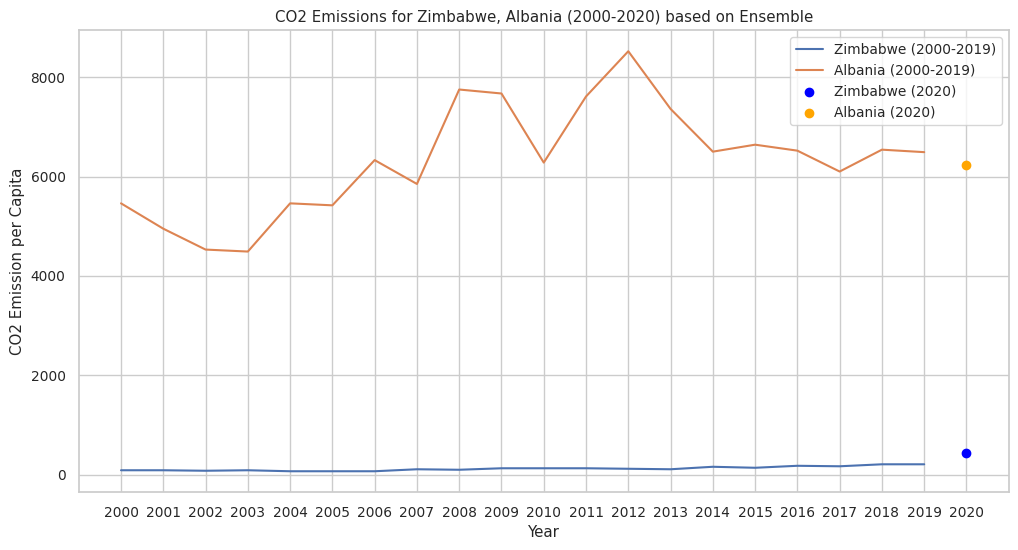

In [220]:
# Filter data for India, UK, and United States from df
Zim_data = df.loc[df['Country'] == 170.0]
uk_data = df.loc[df['Country'] == 168.0]

# Filter data for India, UK, and United States from df1 for the year 2020
Zim_data_2020 = df1[(df1['Country'] == 170.0) & (df1['Reported_Year'] == 2020.0)]
uk_data_2020 = df1[(df1['Country'] == 168.0) & (df1['Reported_Year'] == 2020.0)]

# Plotting till 2019
plt.figure(figsize=(12, 6))
plt.plot(Zim_data['Reported_Year'], Zim_data['CO2Emission_perCapita'], label='Zimbabwe (2000-2019)')
plt.plot(uk_data['Reported_Year'], uk_data['CO2Emission_perCapita'], label='Albania (2000-2019)')


# Plotting 2020
plt.scatter(2020, Zim_data_2020['Co2 Ensemble Predictions'], color='blue', label='Zimbabwe (2020)')
plt.scatter(2020, uk_data_2020['Co2 Ensemble Predictions'], color='orange', label='Albania (2020)')


plt.xticks(range(2000, 2021))
plt.xlabel('Year')
plt.ylabel('CO2 Emission per Capita')
plt.title('CO2 Emissions for Zimbabwe, Albania (2000-2020) based on Ensemble')
plt.legend()
plt.grid(True)
plt.show()


# Conclusions

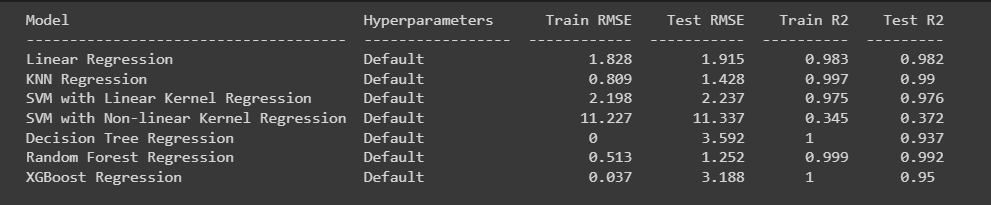

## Based on the predictions and the respective metrics, the Random Forest Regression performed the best. It had the least test RMSE value. To strengthen the overall performance, an ensamble has been done and has given the following outputs. Because the better performing models were combined with some of the weaker ones, the overall Test RMSE did not improve. If given the chance to continue working on the project, in a future scenario, the team would like to optimize by selection a certain combination of Models which outputs a better accuracy with a lower RMSE value.

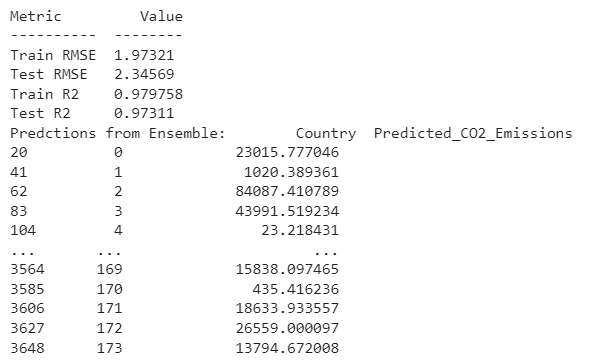